# [scikit-learn](https://scikit-learn.org/stable/index.html)
### [學習文件](https://scikit-learn.org/stable/supervised_learning.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets # 內建data, 產生data4
import sklearn.model_selection # 分割資料模組
import sklearn.neighbors # 鄰進點模組
import sklearn.linear_model # 線性模組
import sklearn.naive_bayes # 貝氏分類模組
import sklearn.tree # 決策樹模組
import sklearn.base # 基底模組
import sklearn.ensemble # 隨機森林
import sklearn.neural_network
import sklearn.decomposition # 特徵擷取降維
import sklearn.manifold
import sklearn.cluster # 分群
import sklearn.mixture # 高斯混合
import sklearn.feature_selection # 自動特徵選取
import sklearn.feature_extraction # 特徵工程
import sklearn.metrics # 評分功能 性能指標 成對指標 距離計算
import sklearn.metrics.pairwise  # 距離計算
%matplotlib inline

## [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [2]:
iris = sklearn.datasets.load_iris() # 函數method
iris.keys() # 擁有的屬性

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.DESCR) # 描述

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.target_names # 分類花的種類名稱

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(iris.target) # 分類的 labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
iris.feature_names # 花的特徵名稱

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
# data in pandas
X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = pd.DataFrame(iris.target, columns=['target'])
data = X.join(Y)
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### 資料分割  [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* `stratify` (y_array) 按照target比例切分資料 

In [9]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1) # 實例化KNN
# 資料分割
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, test_size=0.25)

## ML model 使用三步驟
* fit 訓練
* predict 預測
* score 評估

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
print('y_test:', y_test)
print('X_test:', knn.predict(X_test))

y_test: [2 2 1 1 1 2 1 1 0 2 2 0 0 1 2 0 1 0 2 0 1 1 2 0 1 2 1 0 1 1 2 0 1 0 0 0 0
 2]
X_test: [2 2 1 1 1 2 1 1 0 2 2 0 0 1 1 0 1 0 2 0 1 1 2 0 1 2 2 0 1 1 2 0 1 0 0 0 0
 2]


In [12]:
knn.score(X_test, y_test)

0.9473684210526315

### 儲存模型

#### 1. pickle 醃黃瓜速度比較慢

```python
import pickle
# save
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
# restore
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

# model.score(X, y)
```

#### 2. sklearn.externals.joblib 內建儲存模塊

```python
from sklearn.externals import joblib
# save
joblib.dump(model, 'model.pkl')
# restore
model = joblib.load('model.pkl')

# model.score(X, y)...
```


# 監督式學習

## ML 兩大分支:  

### 分類(classification)
    * sklearn.neighbors.KNeighborsClassifier 鄰近點的target多者
    
### 迴歸(regression)
    * sklearn.neighbors.KNeighborsRegressor 鄰近點的values平均
    * sklearn.linear_model.LinearRegression 線性迴歸

## KNN ([k-nearest neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors))
* [數學模型](https://scikit-learn.org/stable/modules/neighbors.html)
* `sklearn.neighbors.KNeighborsClassifier(n_neighbors=n)` (鄰近點分類)
* `sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)` (鄰近點回歸)
* n_neighbors 參考鄰近點的數量
* 分類問題用鄰近點的 class 投票
* 迴歸問題用鄰近點的 values 平均

### 資料生成
* [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)( ) 生成線性回歸資料(高斯分佈)
    * n_samples(資料數)
    * n_features(特徵數-X維度)
    * n_targets(目標數-y維度)
    * n_informative(與y線性關係個數, 沒有的話那個特徵w就會是0) 
    * bias(截距)
    * noise(雜訊)

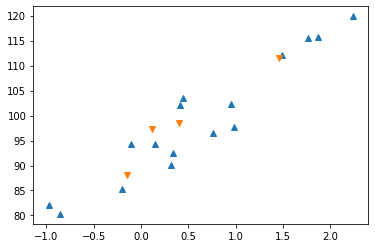

In [13]:
# 資料生成
X, y = sklearn.datasets.make_regression(n_samples=20,n_features=1, bias=90, noise=4, random_state=0)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=13)

plt.plot(X_train, y_train, '^')
plt.plot(X_test, y_test, 'v')

0.7754984489566632


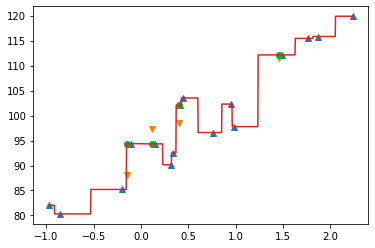

In [14]:
n = 1
knr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)
knr.fit(X_train, y_train)
y_predict = knr.predict(X_test)

line = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]

plt.plot(X_train, y_train, '^')
plt.plot(X_test, y_test, 'v')
plt.plot(X_test, y_predict, 'o')
plt.plot(line, knr.predict(line))
print(knr.score(X_test, y_test))

## 線性迴歸 ([Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
* [數學模型](https://scikit-learn.org/stable/modules/linear_model.html)
* data: $X, y$
* 權重(斜率): $W$ ,特徵: $X$, 廣義定義為`array`
* $W = w_0 + w_1 + w_2...$
* $X = x_0 + x_1 + x_2...$
* 截距 $b$ 定義為常數
* $\hat{y}= W\cdot X + b = w_0*x_0 + w_1*x_1+w_2*x_2... + b$
* find $W$ & $b$ 令 $\sum_{i=1}^{n} (y-\hat{y})^2$ 最小

### model.屬性
* 並非所有模型都有
* `model.C`  (模型偏重)
* `model.classes_`  (分類問題的 $\hat{y}$ 種類)
* `model.class_weight_`  (分類權重？)
* `model.coef_`  (W 權重 weight)
* `model.intercept_ `  (b 偏差 bias)
* `model.class_count_` 分類計數(貝氏分類)
* `model.class_prior_` 分類機率(貝氏分類)
* `model.predict_proba(X)` 各class 的機率 

斜率w: [51.85713585] --- w: 52.063506351133185
截距b: 15.893200983052381 --- b: 15


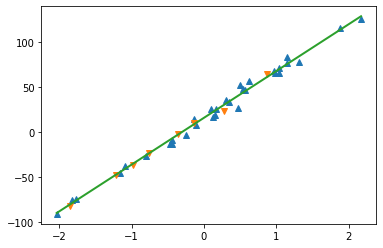

In [15]:
# 簡單線性回歸 y = wx + b
# 資料生成
b = 15
X, y, c = sklearn.datasets.make_regression(n_samples=40, n_features=1, bias=b, noise=5, random_state=17, coef=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=3)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
print('斜率w:', lr.coef_, '--- w:', c)
print('截距b:', lr.intercept_, '--- b:', b)

line_x = np.linspace(X.min(), X.max(), 2)
line_y = line_x * lr.coef_ + lr.intercept_
plt.plot(X_train, y_train, '^')
plt.plot(X_test, y_test, 'v')
plt.plot(line_x, line_y, lw=2)

In [16]:
# 兩者靠近代表 沒有overfitting
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9912842141857271
0.9961146753991162


### 多變數線性迴歸 (Ridge regression)

* 數學函數同一般線性回歸 + L2正規化(希望 w 越小越好)
* $\alpha$ 調整正規化比例, 當$\alpha=0$ 等於線性迴歸
* $\hat{y}= W\cdot X + b$
* find $W$ & $b$ 令 $\sum_{i=1}^{n} (y-\hat{y})^2 + \alpha \sum_{i=1}^{n} w^2$ 最小

In [17]:
bos = sklearn.datasets.load_boston()

X, y = bos.data, bos.target # 這樣才有多變數
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

lr = sklearn.linear_model.LinearRegression()
rig0 = sklearn.linear_model.Ridge(alpha=0)
rig1 = sklearn.linear_model.Ridge(alpha=1) # 預設
lr.fit(X_train, y_train)
rig0.fit(X_train, y_train)
rig1.fit(X_train, y_train)
# 𝛼 = 0 
print(np.allclose(lr.coef_, rig0.coef_))
print(rig0.score(X_train, y_train))
print(rig0.score(X_test, y_test))
print(rig1.score(X_train, y_train))
print(rig1.score(X_test, y_test))

True
0.7862921698574297
0.5298355762070985
0.7850903464137989
0.5215637728363964


### L1正規劃線性迴歸化 (Lasso)
* 數學函數同一般線性回歸 + L1正規化(希望 w 越小越好)
* $\alpha$ 調整正規化比例, 當$\alpha=0$ 等於線性迴歸
* $\hat{y}= W\cdot X + b$
* find $W$ & $b$ 令 $\sum_{i=1}^{n} \frac{1}{2n_{(sample)}} (y-\hat{y})^2 + \alpha \sum_{i=1}^{n} |w|$ 最小

In [18]:
limit = 1e-8
las0 = sklearn.linear_model.Lasso(alpha=limit) # 取0會警告
las1 = sklearn.linear_model.Lasso(alpha=1) # 預設
las0.fit(X_train, y_train)
las1.fit(X_train, y_train)
# 𝛼 = 0 
print(np.allclose(lr.coef_, las0.coef_))

True


###  Regression Example
* $X = x_0 + x_1 + x_2$
    * $x_0 = x$
    * $x_1 = x^{2}$
    * $x_2 = x^{3}$
* $\hat{y}= W\cdot X + b$

/home/sppool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010415098615762753, tolerance: 1.8369719364463668e-05
  positive)


(-0.3, 1.2)

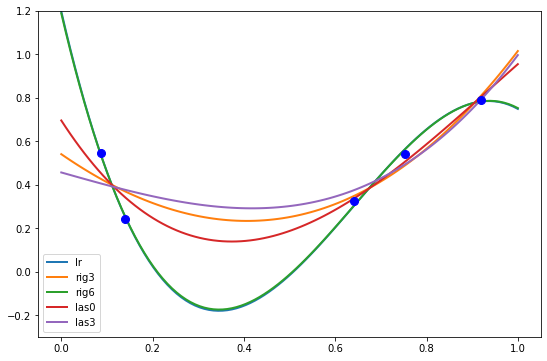

In [19]:
np.random.seed(seed=77)
data = np.random.uniform(size=10).reshape(2, 5) # 資料生成

x, y = data[0][:, np.newaxis], data[1]
X = np.concatenate((x, x**2, x**3), 1)
x = np.linspace(0, 1, 100)
x_ = np.vstack((x, x**2, x**3)).T

lr = sklearn.linear_model.LinearRegression()
rig3 = sklearn.linear_model.Ridge(alpha=1e-3)
rig6 = sklearn.linear_model.Ridge(alpha=1e-6)
las0 = sklearn.linear_model.Lasso(alpha=1e-10)
las3 = sklearn.linear_model.Lasso(alpha=1e-3)

plt.figure(figsize=(9, 6))
for s in ['lr', 'rig3', 'rig6', 'las0', 'las3']:
    exec(s + '.fit(X, y)')
    # @ 內積.dot
    plt.plot(x, eval('x_ @' + s +'.coef_ + ' + s + '.intercept_'), label=s, lw=2)
plt.plot(data[0], data[1], 'ob', ms=8)
plt.legend()
plt.ylim(-0.3, 1.2)

### 資料預處理(縮放資料)
* 不同特徵的範圍比例差異過大,導致學習不佳,使用正規化讓資料縮放到相同比例大小
* sklearn 的正規化叫scale, 會針對不同特徵來正規化
* 直接轉換(轉換的資料就是fit的資料)：
    * [`sklearn.preprocessing.scale`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)(X), 平均值=0, 標準差=1, (數值比例不變)
    * [`sklearn.preprocessing.robust_scale`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale)(X), 中位數=0, (75%位數-25%位數)=1, (數值比例不變)
    * [`sklearn.preprocessing.minmax_scale`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html)(X, feature_range=(min, max)), 指定投影範圍, (數值比例不變)
* fit模型轉換：
    * `sklearn.preprocessing.StandardScaler`
    * `sklearn.preprocessing.RobustScaler`
    * `sklearn.preprocessing.MinMaxScaler`
    * mode.fit(X_train) 轉換模型的訓練資料
    * mode.transform(X_test) 轉換資料

10.434198318253317  ~  13.479276130592016
-8.165316878033918  ~  -1.8561960455515756
-2.13990534429255  ~  2.1800568778732248
3.0  ~  9.0


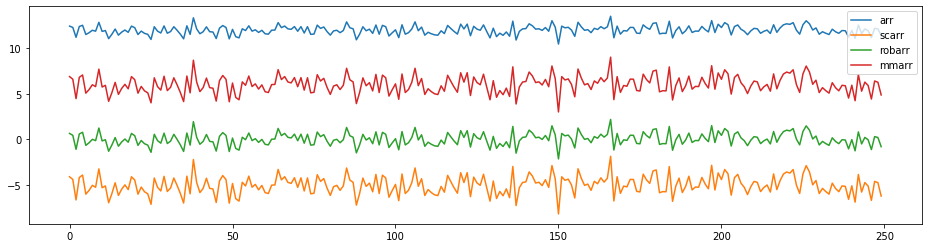

In [20]:
arr = np.random.normal(loc=12, scale=0.5, size=250) # 隨機生成 10~14
scarr = sklearn.preprocessing.scale(arr) - 5 # means=-5, std=1
robarr = sklearn.preprocessing.robust_scale(arr) # 中位數=0, 四分位=1
mmarr = sklearn.preprocessing.minmax_scale(arr, feature_range=(3, 9)) # 投影到 3~9
print(arr.min(), ' ~ ', arr.max())
print(scarr.min(), ' ~ ', scarr.max())
print(robarr.min(), ' ~ ', robarr.max())
print(mmarr.min(), ' ~ ', mmarr.max())
plt.figure(figsize=(16, 4))
plt.plot(arr, '-', label='arr')
plt.plot(scarr, '-', label='scarr')
plt.plot(robarr, '-', label='robarr')
plt.plot(mmarr, '-', label='mmarr')
plt.legend()

### 使用模組 X_train 紀錄轉換
* 分布形狀並不會變化

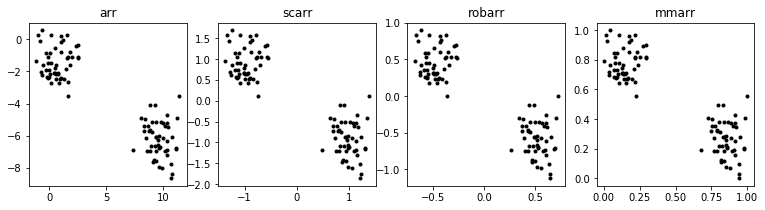

In [21]:
arr, _ = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2)
scarr = sklearn.preprocessing.StandardScaler().fit_transform(arr)
robarr = sklearn.preprocessing.RobustScaler().fit_transform(arr)
mmarr = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(arr)
lst = ['arr', 'scarr', 'robarr', 'mmarr']

fig, axs = plt.subplots(ncols=4,  figsize=(13, 3))
for ax, name in zip(axs.flat, lst):
    ax.plot(eval(name)[:, 0], eval(name)[:, 1], 'ko', ms=3)
    ax.set_title(name)

### 其他的數值處理模組
* 直接轉換(轉換的資料就是fit的資料)：
    * `sklearn.preprocessing.normalize` 函數正規化 L1, L2
* fit模型轉換：
    * `sklearn.preprocessing.Normalizer` 正規化(row)

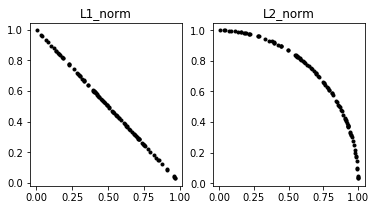

In [22]:
arr = np.random.uniform(size=(100, 2))
L1_norm = sklearn.preprocessing.Normalizer(norm='l1').fit_transform(arr)
L2_norm = sklearn.preprocessing.Normalizer(norm='l2').fit_transform(arr)
lst = ['L1_norm', 'L2_norm']

fig, axs = plt.subplots(ncols=2,  figsize=(6, 3))
for ax, name in zip(axs.flat, lst):
    ax.plot(eval(name)[:, 0], eval(name)[:, 1], 'ko', ms=3)
    ax.set_title(name)

# 線性分類 (Linear models for classification)
* 邏輯迴歸 (logisitic regression) `sklearn.linear_model.LogisticRegression`
* 線性支援向量機 (linear support vector machines SVM) `sklearn.svm.LinearSVC`

## 二維分類 (Binary Classification)
* 選用不同的 Function set 和  Loss Function 決定哪種分類方式
* data: $X, y$
* $y \in \{1, -1\}^n$
* step:
    1. Function set (Model): $\hat{y}=$ 
        * $0$  $(f(X)<0)$
        * $1$  $(f(X)>0)$
        
    2. Loss Function:
        * Ideal Loss: $L(f) = \sum_{i=1}^{n}\delta(\hat{y}=y)$ (True=0, False=1), 可是離散無法微分
        * Square Loss: $\sum_{i=1}^{n}(yf(X)-1)^{2}$ 
            * $f(X)$ close to 1 (if $y = 1$)
            * $f(X)$ close to -1 (if $y = -1$)
            * 迴歸使用的Square loss不適用分類問題classification, 迴歸才須必須貼近y值, 當分類問題只有-1, 1就會出現問題
        * Sigmonid + Square Loss: $\sum_{i=1}^{n}(\sigma(yf(X))-1)^{2}$ 
            * $\sigma(f(X))$ close to 1 (if $y = 1$)
            * $\sigma(f(X))$ close to 0 (if $y = -1$)
            * $\sigma(f(X)) = 1 -\sigma(-f(X))$
            * Sigmonid 函數與 機率 0, 1, 的 Square Loss, 無法"順利"的找到最小值
        * Sigmonid + cross-entropy: $\sum_{i=1}^{n}\ln(1+e^{-yf(x)})$
            * 即 __logistic regression__ (下方有推導)
        * Hinge Loss: $max(0, 1 - yf(X))$
            * __SVM__
    3. Training
        * find minmal loss func

### 繪製loss-func, x軸為 y*f(X)

* f(X)>0 y=1, f(X)<0 y=-1, 正確預測, y*f(X)為正
* f(X)<0 y=1, f(X)>0 y=-1, 錯誤預測, y*f(X)為負
* 理想的loss-func: y*f(X)越大, loss越小

Text(0.5, 1.0, '$loss-func$')

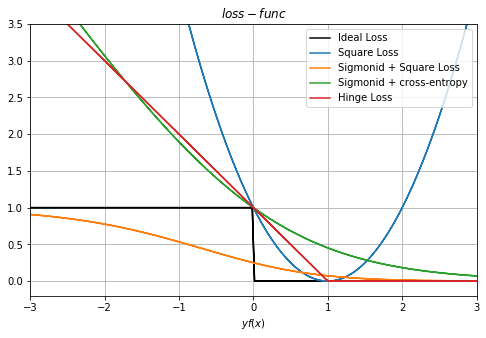

In [23]:
def σ(arr): # sigmonid-func
    return 1/(1 + np.exp(-arr))

# Loss function --- y*f(X)(同相為正, 反向為負),理想lossfunc, y*f(X)越大, loss—func越小
fx = np.linspace(-3, 3, 200)
fx = np.concatenate((fx, fx))
yh = (fx > 0).astype(np.int) - (fx < 0).astype(np.int)
siz = fx.size//2
y = np.concatenate((np.ones(siz), -np.ones(siz)))
yfx = y * fx
id_ = (yh != y).astype(np.int)
sq = (yfx - 1)**2
sig_sq = (σ(yfx) - 1)**2
cross = np.log2(1 + np.exp(-yfx))
hinge = np.maximum(0, 1 - yfx)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(yfx, id_, '-', label='Ideal Loss', c='k')
ax.plot(yfx, sq, '-', label='Square Loss')
ax.plot(yfx, sig_sq, '-', label='Sigmonid + Square Loss')
ax.plot(yfx, cross, '-', label='Sigmonid + cross-entropy')
ax.plot(yfx, hinge, '-', label='Hinge Loss')

ax.grid(True)
ax.axis((-3, 3, -0.2, 3.5))
plt.xlabel('$yf(x)$')
plt.legend(loc=1)
plt.title('$loss-func$')

## 邏輯迴歸 ([logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))
* $y \in \{-1, 1\}^n$ 分類值域
1. step1: Function set (Model)
    * 把線性回歸的model放入機率模型(Sigmoid)
    * $f(X)= W\cdot X + b$
    * 為 -1 or 1 機率 p(X): $\hat{y} = \sigma(f(X)) = 1/(1+e^{-f(X)})$
    * Sigmoid 的特性 + 二分類: 為 1 的機率p(X) = 1 - P(-X) 為 -1 的機率 ($\sigma(yf(X))$)
    
2. step2: Loss Function
    * find $\max{\prod_{i=1}^{n}\sigma(yf(X))}$ (把所有 train data 的 X 為 y 機率全部相乘, 找最大的機率成積)
    * 取log(相乘變相加), 乘上-1(變成找最小):
    * loss func: $\min - \sum_{i=1}^n \ln(1) - \ln(1 + e^{-yf(X)}) = \min \sum_{i=1}^n \ln(1 + e^{-yf(X)})$
    * $\sum_{i=1}^n -y\log{\hat{y}} - (1-y)\log{(1-\hat{y})}$ __*(Cross Entrop)*__
    * 判對錯誤時 loss 極大的概念
    
3. step3: Training
    * find $W$ & $b$ 令 Loss Func 最小
    
* [數學模型:](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
    * 參數: penalty 正規劃設定, C 邏輯迴歸強度(正規劃比例)
    * L2正規化: $\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^{n} \log(\exp(- y_i (X_i^T w + c)) + 1)$
    * L1正規化: $\min_{w, c} \|w\|_1 + C \sum_{i=1}^{n} \log(\exp(- y_i (X_i^T w + c)) + 1)$
    * 彈性設定:$\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^{n} \log(\exp(- y_i (X_i^T w + c)) + 1)$

In [24]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

(0, 1)

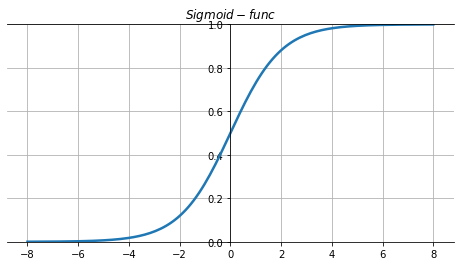

In [25]:
x = np.linspace(-8, 8, 150)
p = Sigmoid(x) # 機率

fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.plot(x, p, lw=2.5)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.grid(True)
plt.title('$Sigmoid-func$')
plt.ylim((0, 1))

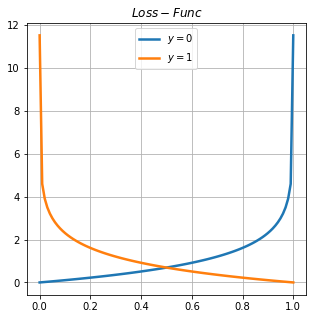

In [26]:
limit = 1e-5
p = np.linspace(limit, 1-limit, 100) # p=0, cost=oo
cost1 = -np.log(p) # 機率
cost0 = -np.log(1 - p) # 機率

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.plot(p, cost0, lw=2.5, label='$y = 0$')
ax.plot(p, cost1, lw=2.5, label='$y = 1$')
ax.legend()
plt.title('$Loss-Func$')
ax.grid(True)

### 資料生成
* [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)( )
    * n_samples(資料數-X維度)
    * n_features(特徵數)
    * centers(label分類數))

Text(0, 0.5, 'Feature 1')

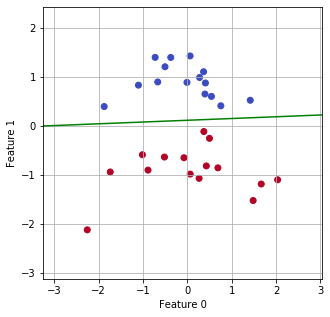

In [27]:
X, Y = sklearn.datasets.make_blobs(n_samples=30, n_features=2, centers=2, random_state=94) # 資料生成
X = sklearn.preprocessing.scale(X) # 特徵正規化

log = sklearn.linear_model.LogisticRegression(C=1e3, solver='lbfgs') # C越大＝沒有正規化
log.fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

# 等高線畫法
# x = np.linspace(x1min, x1max, 100) # shape:(100)
# y = np.linspace(x2min, x2max, 100) # shape:(100)
# x, y = np.meshgrid(x, y) # 網格 shape:(100, 100)
# xy = np.concatenate((x[:,:,np.newaxis], y[:,:,np.newaxis]), axis=2) # shape:(100, 100, 2)
# y_hat = (log.coef_ * xy).sum(2) + log.intercept_ # y = WX + b, shape:(100 ,100)
# p = 1/(1 + np.exp(-y_hat)) # 機率 p = 1/(1+e^-y), shape:(100 ,100)

line_x = np.array((x1min, x1max)) # WX + b = 0, P(x) = 0.5
line_y = -(line_x * log.coef_[0, 0] + log.intercept_[0]) / log.coef_[0, 1]

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=matplotlib.cm.coolwarm)
ax.plot(line_x, line_y, 'g') # 直接取斜率
# cntr = ax.contour(x, y, p, levels=1, cmap=matplotlib.cm.cool) # 等高線畫圖
# ax.clabel(cntr, fontsize=10) # 線條數值文字
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# fig.colorbar(cntr, ax=ax) # colorbar

## 支援向量機 ([support vector machines SVM](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm))
* SVM (Support Vector Machine) 支持向量機
* SVC (Support Vector Classification) 支持向量機用於分類
* SVR (Support Vector Regression) 支持向量機用於迴歸分析
* sklearn.svm 模組
    * `LinearSVC` (Linear Support Vector Classification) 線性支援向量機分類
    * `LinearSVR` (Linear Support Vector Regression) 線性支援向量機迴歸
    * `SVC` (Support Vector Classification) 
    * `SVR` (Support Vector Regression)
    
### SVC (Support Vector Classification)
* $y \in \{-1, 1\}^n$
1. step1: Function set (Kernel functions)
    * Kernel='linear', 'poly', 'rbf', 'sigmoid'
    * linear: $\langle x, x'\rangle$
    * polynomial: $(\gamma \langle x, x'\rangle + r)^d$, $d:$ `degree`, $r:$ `coef0`
    * rbf: $\exp(-\gamma \|x-x'\|^2)$, $\gamma:$ `gamma`
    * sigmoid: $\tanh(\gamma \langle x,x'\rangle + r)$, $r:$ `coef0`
2. step2: Loss Function
    * $loss func = Hinge Loss$
3. step3: Training
    * find $W$ & $b$ 令 Loss Func 最小
    
* [sklearn 數學模型:](https://scikit-learn.org/stable/modules/svm.html) 
* $\begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}$
* 數據預處理格外重要(每個特徵x的正規化) 建議平均值0, 標準差1, 即`sklearn.preprocessing.scale`
* class數據量不平衡(差異過大) setting: class_weight='balanced'
* [about "C"](https://www.youtube.com/watch?v=Lpr__X8zuE8)

Text(0, 0.5, 'Feature 1')

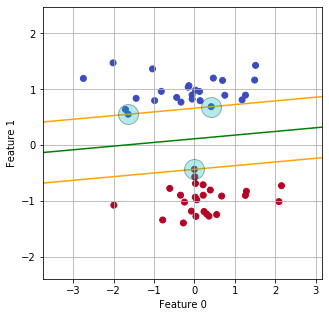

In [28]:
X, Y = sklearn.datasets.make_blobs(n_samples=50, n_features=2, centers=2, random_state=8) # 資料生成
X = sklearn.preprocessing.scale(X) # 特徵正規化

# svm = sklearn.svm.LinearSVC(C=1e3) # 同下
svm = sklearn.svm.SVC(kernel='linear', C=1e3) # 同上
svm.fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

line_x = np.array((x1min, x1max)) # WX + b = 0
line_y = -(line_x * svm.coef_[0, 0] + svm.intercept_[0]) / svm.coef_[0, 1]
line_yn = -(line_x * svm.coef_[0, 0] + svm.intercept_[0] - 1) / svm.coef_[0, 1]
line_yp = -(line_x * svm.coef_[0, 0] + svm.intercept_[0] + 1) / svm.coef_[0, 1]

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=matplotlib.cm.coolwarm)
ax.plot(line_x, line_y, 'g') # WX + b = 0
ax.plot(line_x, line_yn, 'orange') # WX + b = 1
ax.plot(line_x, line_yp, 'orange') # WX + b = -1
# svm.support_vectors_ 紀錄接觸的點位
ax.plot(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 'oc', mec='k', ms=20, alpha=0.3)

ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 如何分類一維中適當性分類(定義特徵的範圍, 過多過少都不行的概念)
* 導入非線性SVM
* 這裡的方法比較像 kernel=poly 多項式核心

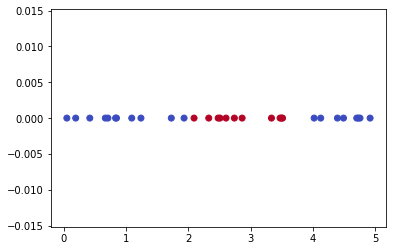

In [29]:
# svm 線性不可分割案例(創造出新維度)
np.random.seed(9)
X = np.random.uniform(0, 5, 30).reshape(-1, 1) 
Y = ((2 < X) & (X < 4)).astype(np.int)[:, 0]
plt.scatter(X[:, 0], np.zeros_like(Y), c=Y, cmap=matplotlib.cm.coolwarm)

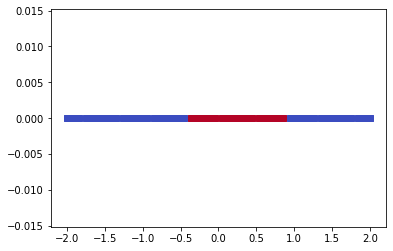

In [30]:
model = sklearn.svm.SVC(kernel='rbf', C=1e3)
model.fit(sklearn.preprocessing.scale(X), Y)
x = np.linspace(-2, 2, 50)
y = model.predict(x[:, np.newaxis])
plt.scatter(x, np.zeros_like(x), marker='s', c=y, cmap=matplotlib.cm.coolwarm)

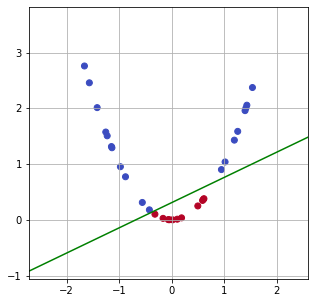

In [31]:
X = sklearn.preprocessing.scale(X) # 正規劃
X = np.concatenate((X, X**2), axis=1) # 創造了新軸

model = sklearn.linear_model.LogisticRegression(C=1e3, solver='lbfgs')
model.fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

line_x = np.array((x1min, x1max)) # WX + b = 0, P(x) = 0.5
line_y = -(line_x * model.coef_[0, 0] + model.intercept_[0])/model.coef_[0, 1]

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=matplotlib.cm.coolwarm)
ax.plot(line_x, line_y, 'g') # 直接取斜率
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)

### 多維度的展現
* 即`kernel = 'rbf'`
* rbf: $\exp(-\gamma \|x-x'\|^2)$, $\gamma:$ `gamma`
* 重要參數
    * `C`
    * `gamma`
* `model.dual_coef_` 支援相量的重要性

Text(0, 0.5, 'Feature 1')

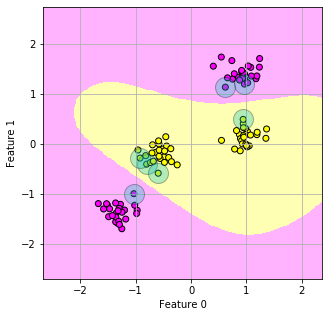

In [32]:
X, Y = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=4, random_state=8) # 資料生成
Y = Y % 2 # 整合成兩個class
X = sklearn.preprocessing.scale(X) # 特徵正規化

svm = sklearn.svm.SVC(kernel='rbf', C=1e3)
svm.fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.3, cmap=matplotlib.cm.spring)
# svm.support_vectors_ 紀錄接觸的點位
ax.plot(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 'oc', mec='k', ms=20, alpha=0.3)

ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

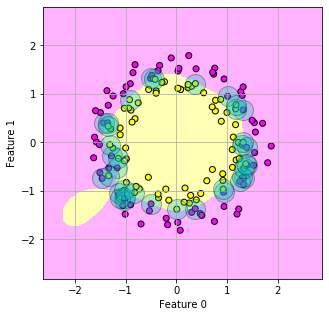

In [33]:
X, Y = sklearn.datasets.make_circles(n_samples=150, factor=0.75, noise=0.1) # 資料生成
Y = Y % 2 # 整合成兩個class
X = sklearn.preprocessing.scale(X) # 特徵正規化

svm = sklearn.svm.SVC(kernel='rbf', C=1e3)
svm.fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = svm.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.3, cmap=matplotlib.cm.spring)
# svm.support_vectors_ 紀錄接觸的點位
ax.plot(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 'oc', mec='k', ms=20, alpha=0.3)

ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 多元分類
* 許多線性分類模型都只有二元分類
* 原理是分成多組二元分類(幾個分類就幾組)

/home/sppool/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

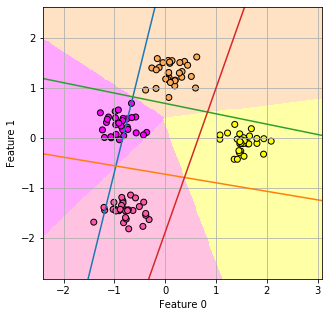

In [34]:
n = 4 # > 2
X, Y = sklearn.datasets.make_blobs(n_samples=30*n, n_features=2, centers=n, random_state=43) # 資料生成
X = sklearn.preprocessing.scale(X) # 特徵正規化
model = sklearn.svm.LinearSVC(C=1e3).fit(X, Y) # 線性模型 SVM
# model = sklearn.linear_model.LogisticRegression(C=1e3, solver='lbfgs').fit(X, Y) # 線性模型 Logistic 迴歸

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

line_x = np.array((x1min, x1max)) # WX + b = 0
for i in range(n):
    exec(f'line_{i+1}=-(line_x * model.coef_[i, 0] + model.intercept_[i]) / model.coef_[i, 1]')

X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = model.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
for i in range(n):
    eval(f'ax.plot(line_x, line_{i+1})')
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 貝氏分類器 ([Naive Bayes Classifiers](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes))

* [數學模型](https://scikit-learn.org/stable/modules/naive_bayes.html)
* 將不同class的data收集並畫出其機率密度(機率密度模型可有多種選擇), 並考慮不同class中的出現機率(data數目比例), 預測是在哪個一個class
* 在不同class數目上有大差距時非常不準確
* `sklearn.naive_bayes.GaussianNB` 連續特徵使用高斯分布函數
    * $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$
* `sklearn.naive_bayes.MultinomialNB`
    * $\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$
* `sklearn.naive_bayes.ComplementNB`
    * $\begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}$
* `sklearn.naive_bayes.BernoulliNB`
    * $P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$


分類label: [0 1 2 3]
分類計數: [30. 30. 30. 30.]
分類機率: [0.25 0.25 0.25 0.25]
分類特徵平均:
 [[-0.88288333  0.25979938]
 [-0.78327614 -1.45630895]
 [ 0.12656365  1.29230852]
 [ 1.53959582 -0.09579896]]
分類特徵變異數:
 [[0.05027077 0.03435483]
 [0.0635633  0.02700952]
 [0.05773916 0.04415754]
 [0.04904863 0.02690789]]


Text(0, 0.5, 'Feature 1')

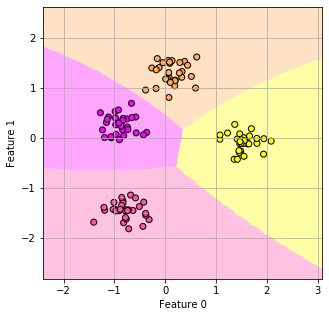

In [35]:
# n = 4
# X, Y = sklearn.datasets.make_blobs(n_samples=45*n, n_features=2, centers=n, random_state=43) # 資料生成
# X = sklearn.preprocessing.scale(X) # 特徵正規化
model = sklearn.naive_bayes.GaussianNB().fit(X, Y)
# model = sklearn.naive_bayes.BernoulliNB().fit(X, Y)

print("分類label:", model.classes_)
print("分類計數:", model.class_count_)
print("分類機率:", model.class_prior_)
print("分類特徵平均:\n", model.theta_)
print("分類特徵變異數:\n", model.sigma_) # 標準差^2

# lim = X.std()
# x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
# x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

# X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
# X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = model.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

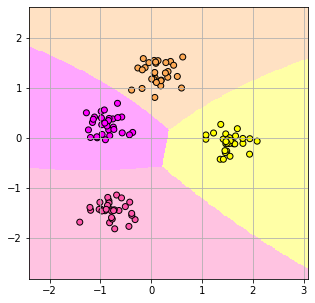

In [36]:
# 模型自刻 --> 高斯分佈
Px = np.exp(-((X_grid[:, np.newaxis, :] - model.theta_)**2)/(2*model.sigma_))/model.sigma_**0.5
# 不同特徵互乘積, 在乘上分類比例 model.class_prior_
label = (Px.prod(-1) * model.class_prior_).argmax(1)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(label.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)

Text(0, 0.5, 'Feature 1')

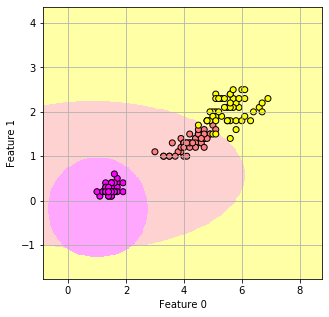

In [37]:
# IRIS 資料分類
X = iris.data[:, [2, 3]] # 取2特徵
Y = iris.target
model = sklearn.naive_bayes.GaussianNB().fit(X, Y)
# model = sklearn.naive_bayes.BernoulliNB().fit(X, Y)
# model = sklearn.naive_bayes.MultinomialNB().fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = model.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 決策樹 ([Decision Tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree))
* `sklearn.tree.DecisionTreeClassifier(max_depth=n)` 決策樹分類, 最多分成 $2^n$ 個區塊
* `sklearn.tree.DecisionTreeRegressor(max_depth=n)` 決策樹迴歸, 最多分成 $2^n$ 個數值
* `sklearn.tree.export_graphviz(tree)` 可以讀取分類方式
* 控制深度參數設定 
    * `max_depth`
    * `max_leaf_nodes`
    * `min_samples_leaf`
* 持續使用特徵(大小值)來做二分法
* 一定可以over fit
* 適合以樹分類的模型
* 不太需要預處理

### 分類決策樹 (sklearn.tree.DecisionTreeClassifier)

[0.41514835 0.58485165]


Text(0, 0.5, 'Feature 1')

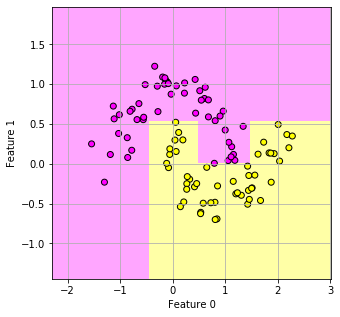

In [38]:
X, Y = sklearn.datasets.make_moons(n_samples=100, noise=0.15) # 資料生成
tree = sklearn.tree.DecisionTreeClassifier().fit(X, Y) # max_depth 深度設定
print(tree.feature_importances_) # 特徵重要性

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
X_grid = np.c_[X1.ravel(), X2.ravel()]
decision_values = tree.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 讀取分類資料

```python
for row in str(sklearn.tree.export_graphviz(tree)).split('\\n'):
    for ro in row.split('\n'):
        print(ro)
        if ro[-1] == ';':
            print('\n')
```

### 決策樹迴歸 (sklearn.tree.DecisionTreeRegressor )
* 階梯式的資料
* 沒有預測過得資料表現力為零

Text(0.5, 0, 'X')

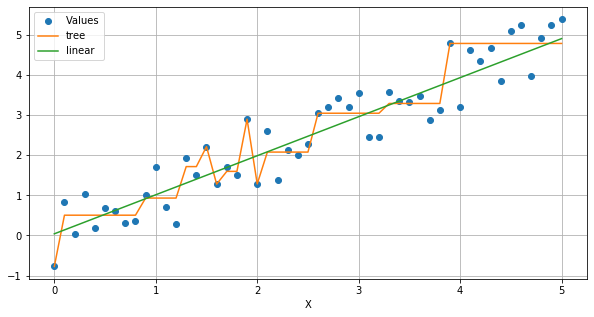

In [39]:
size = 51
X = np.linspace(0, 5, size)[:, np.newaxis]
Y = X[:, 0] + (1 * np.random.uniform(-1, 1, size))
tree = sklearn.tree.DecisionTreeRegressor(max_depth=4).fit(X[:40], Y[:40]) # 對未來時間的預測完全不行
linear = sklearn.linear_model.LinearRegression().fit(X[:40], Y[:40])
X_sort = np.sort(X)

fig = plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(X, Y, 'o', label='Values')
ax.plot(X_sort, tree.predict(X_sort), label='tree')
ax.plot(X_sort, linear.predict(X_sort), label='linear')
ax.grid(True)
ax.legend()
plt.xlabel("X")

## 隨機森林 (RandomForest)
* `sklearn.ensemble.RandomForestClassifier`
    * n_estimators 樹的數目
    * max_features 樹和樹的隨機性
    * max_depth 樹的深度
* `model.estimators_[index]` 個別的單顆樹
* 一堆決策樹的整合
* 平均一堆決策樹(不同的分類方法, 並不是最高深度)
* 比較不會OverFit
* 資料不需要預處理(分類而已)
* 不適合用在過多特徵的分類
* 需要用大量記憶體

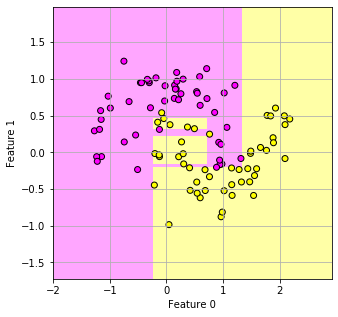

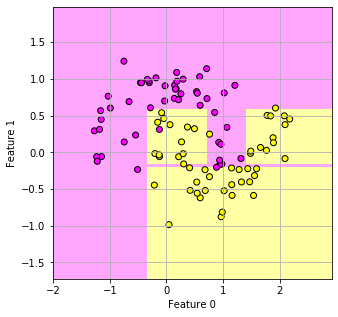

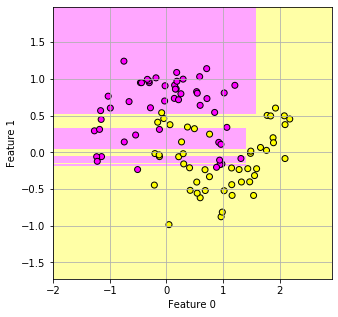

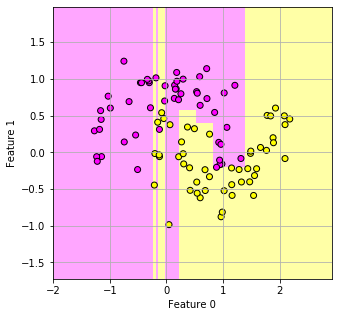

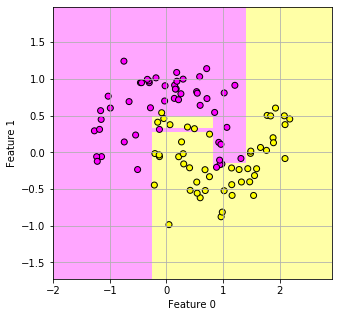

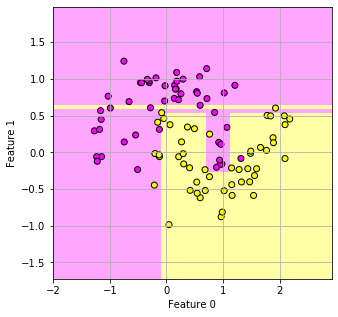

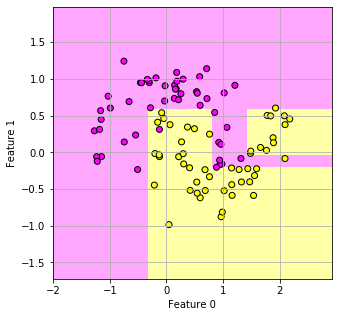

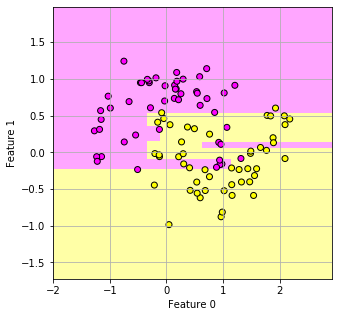

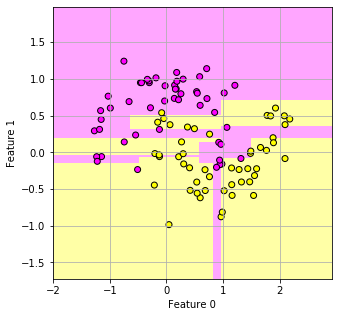

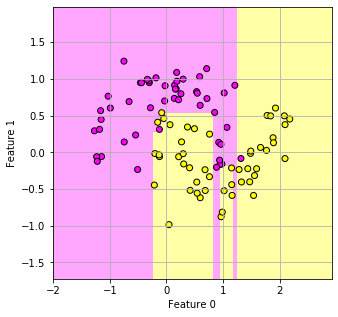

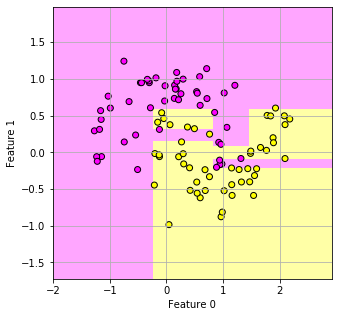

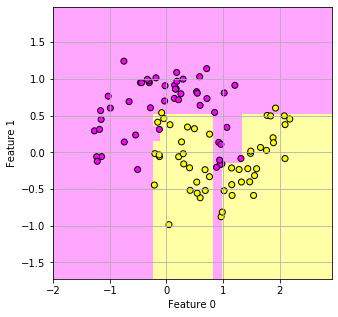

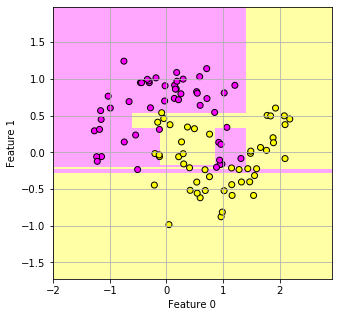

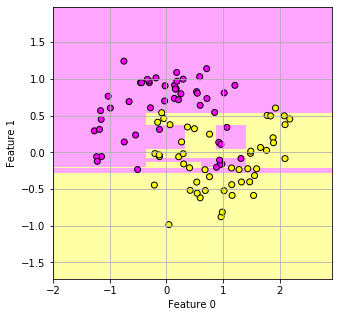

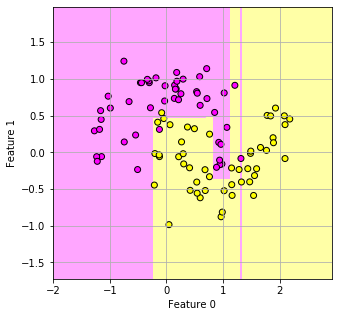

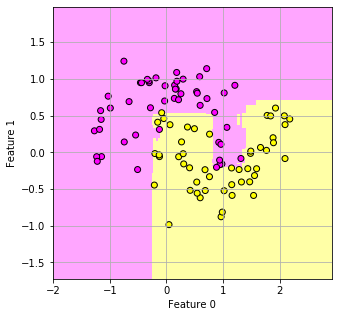

In [40]:
trees = 15
X, Y = sklearn.datasets.make_moons(n_samples=100, noise=0.25) # 資料生成
forest = sklearn.ensemble.RandomForestClassifier(n_estimators=trees)
forest.fit(X, Y)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 300), np.linspace(x2min, x2max, 300))
X_grid = np.c_[X1.ravel(), X2.ravel()]
for i in range(trees+1):
    if i == trees:
        decision_values = forest.predict(X_grid)
    else:
        decision_values = forest.estimators_[i].predict(X_grid)

    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
    ax.axis((x1min, x1max, x2min, x2max))
    ax.grid(True)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()

## 梯度提昇迴歸決策樹 (Gradient Boosted Regression Trees)

* `sklearn.ensemble.GradientBoostingClassifier`
    * n_estimators 樹的數目(學習次數)
    * max_depth 分類深度, 調小可以有效降低OverFit
    * learning_rate 學習率
* 修剪上一棵樹的錯誤
* 資料不需要預處理(分類而已)
* 不適合用在過多特徵的分類

Text(0, 0.5, 'Feature 1')

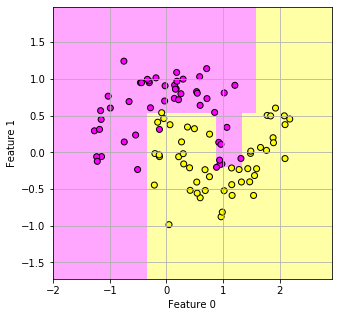

In [41]:
tree = 100
forest = sklearn.ensemble.GradientBoostingClassifier(n_estimators=trees, max_depth=3, learning_rate=0.2)
forest.fit(X, Y)

decision_values = forest.predict(X_grid)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 決策函數(decision_function) 和 預測機率(predict_proba)
* 決策樹系列才有決策函數
* `model.predict_proba(X)` 個別class的機率
* `model.decision_function(X)` 偏向某class的程度
* 兩者是Sogmod函數的關係

In [42]:
print(forest.predict_proba(X[0:5]))
print(forest.decision_function(X[0:5]))
print(Sigmoid(forest.decision_function(-X[0:5])))

[[0.07957715 0.92042285]
 [0.92687304 0.07312696]
 [0.06961762 0.93038238]
 [0.17368465 0.82631535]
 [0.94028216 0.05971784]]
[ 2.44810622 -2.53961943  2.592578    1.55973516 -2.75654927]
[0.05696552 0.79591597 0.07312696 0.78729828 0.96722272]


## 深度學習 神經網路 ([Deep Learning Neural Networks](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network))
* `sklearn.neural_network`
    * `sklearn.neural_network.MLPClassifier` 分類
    * `sklearn.neural_network.MLPRegressor` 迴歸
* [重要參數](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)
    * hidden_layer_sizes
    * activation  ['identity', 'logistic', 'tanh', 'relu']
    * solver  ['lbfgs', 'sgd', 'adam']
    * learning_rate  ['constant', 'invscaling', 'adaptive']
    * learning_rate_init 初始lr
    * max_iter 迭代次數(權重更新次數)

2個 Feature
第1層: (2, 100)
第2層: (100, 10)


Text(0, 0.5, 'Feature 1')

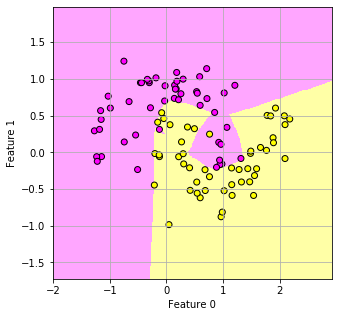

In [43]:
size = [100, 10]
NN = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=size, solver='lbfgs')
NN.fit(X, Y)
print(f'2個 Feature')
for i in range(len(size)):
    print(f'第{i+1}層:', NN.coefs_[i].shape)
decision_values = NN.predict(X_grid)
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=Y, ec='k', cmap=matplotlib.cm.spring)
ax.imshow(decision_values.reshape(X1.shape), extent=(x1min, x1max, x2min, x2max), aspect='auto', origin='lower', alpha=0.35, cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 非監督式學習

## 降維特徵擷取(Feature Extraction)
* `PCA`(主成分分析)
* `ICA`(獨立成分分析)
* `NMF`(非負矩陣分解)

## [PCA 主成分分析(Principal components analysis)](https://www.youtube.com/watch?v=FgakZw6K1QQ)
* `sklearn.decomposition.PCA`重要屬性
    * `model.components_` 組合新特徵的原始特徵組合 (即為一個正交矩陣)
    * `model.explained_variance_ratio_` 主成分PC 影響比例
* [數學模型](https://scikit-learn.org/stable/modules/decomposition.html#pca)
* 使用前一定要先預處理縮放資料([some tips](https://www.youtube.com/watch?v=oRvgq966yZg))
* 可以想像為資料在空間中位置不變, 原本的特徵軸在空間中旋轉找到主成分, 而保留的主成分數量為新軸(由原特徵線性組合)
* 且所有主成分(新軸)都彼此正交！ (信息上不重疊)
* 原本有少特徵, 就能產生幾個新的PC, 降維就是選擇相對高的PC, 但是對ML的表現並不會有更好的結果
* 主成分分析的重點是, 將同類型影響的特徵整合成的新主成分, 當特徵間彼此有線性關係時最適合使用PCA (特徵A = w * 特徵B)

#### 對雙特徵的主成分就是旋轉軸心

Text(0, 0.5, 'PC 1')

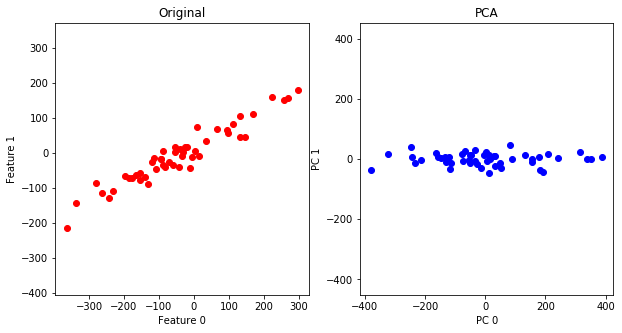

In [44]:
X, y = sklearn.datasets.make_regression(50, 1, bias=10, noise=25, random_state=3)
X = np.concatenate((X*150, y[:, np.newaxis]), axis=1)
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)
trans = pca.transform(X)

fig, axs = plt.subplots(ncols=2,  figsize=(10, 5))
axs[0].plot(X[:, 0], X[:, 1], 'ro')
axs[0].axis('equal')
axs[0].set_title('Original')
axs[0].set_xlabel("Feature 0")
axs[0].set_ylabel("Feature 1")
axs[1].plot(trans[:, 0], trans[:, 1], 'bo')
axs[1].axis('equal')
axs[1].set_title('PCA')
axs[1].set_xlabel("PC 0")
axs[1].set_ylabel("PC 1")

In [45]:
print('主成分組成:\n', pca.components_)
print('主成分組成平方和(表示主成份都是正交)\n', (pca.components_**2).sum(1))
print('PC 影響程度:\n', pca.explained_variance_ratio_)
print('轉換的新軸, 平均為0 :', trans.mean(0))

主成分組成:
 [[ 0.8850343   0.46552582]
 [-0.46552582  0.8850343 ]]
主成分組成平方和(表示主成份都是正交)
 [1. 1.]
PC 影響程度:
 [0.98590055 0.01409945]
轉換的新軸, 平均為0 : [ 7.38964445e-15 -6.46593890e-15]


### 多特徵的降維PCA

Text(0, 0.5, 'Feature 1')

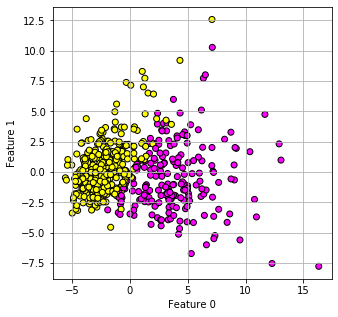

In [46]:
cencer = sklearn.datasets.load_breast_cancer()
pca = sklearn.decomposition.PCA(n_components=30)
data = sklearn.preprocessing.scale(cencer.data) # 資料縮放
pca.fit(data)
trans = pca.transform(data)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(trans[:, 0], trans[:, 1], c=cencer.target, ec='k', cmap=matplotlib.cm.spring)
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [47]:
print('主成分組成:\n', pca.components_[0:2])
print('PC 影響程度:\n', pca.explained_variance_ratio_)
print('任意PC正交:', np.isclose(np.dot(pca.components_[8], pca.components_[5]), 0))

主成分組成:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
PC 影響程度:
 [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e

### 人臉辨識的PCA
* 每張圖片的每個像素都是一維度的特徵
* 主成份就是每個特徵的線性組合比例

people.images.shape: (3023, 62, 47)
Number of classes: 62


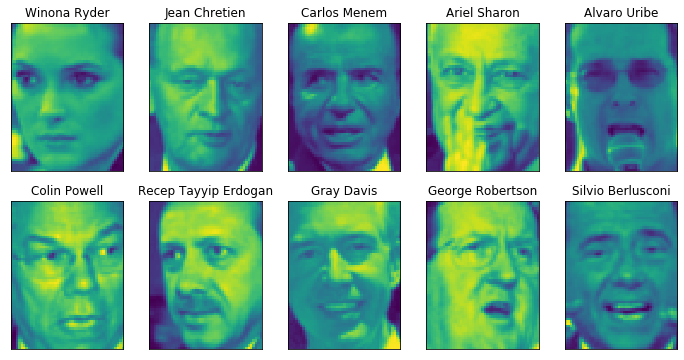

In [48]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.5)
image_shape = people.images[0].shape

print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks': (), 'yticks': ()}) # subplot_kw 刪除座標標示
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

#### PCA 原始特徵的線性組合

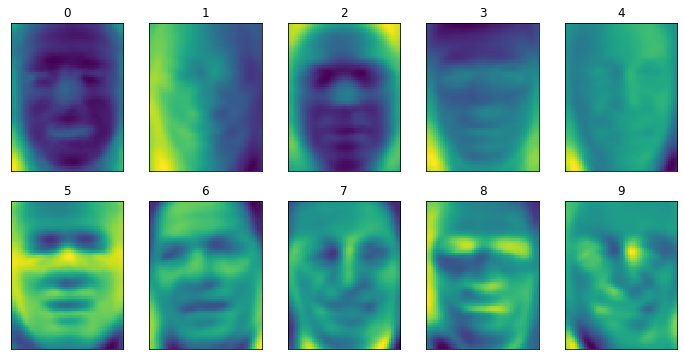

In [49]:
pca = sklearn.decomposition.PCA(n_components=500)
pca.fit(people.data)
h, w = people.images.shape[1:]

images = pca.components_.reshape(-1, h, w) # 抓取主成分的原特徵比例, 並reshape

fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks': (), 'yticks': ()}) # subplot_kw 刪除座標標示
i = 0
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(i)
    i += 1

#### 圖片變成了新成份的線性組合

前500大主成分佔比: 0.99059397


Text(0.5, 1.0, 'Arnold Schwarzenegger')

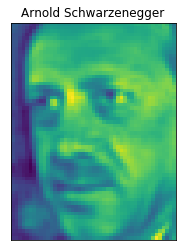

In [50]:
n = 500 # 取前幾大主成分
print(f'前{n}大主成分佔比:', pca.explained_variance_ratio_[0:n].sum())
ind = 6
new_pc0 = pca.transform(people.data)[ind] # 第一張圖片在主成分中的座標
image0 = (new_pc0[0:n, np.newaxis] * pca.components_[0:n]).sum(0).reshape(h, w) # 每個主成分按照比例相加
plt.imshow(image0)
plt.xticks([])
plt.yticks([])
plt.title(people.target_names[ind])

## [NMF 非負矩陣分解(Non-Negative Matrix Factorization)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)
* `sklearn.decomposition.NMF`
* 資料需要縮放到正值
* 適合找有趣的特徵
* 限制一定要降微, 降低的維度不同會有不同的結果
* [非負矩陣分解NMF](https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/560096/#outline__1)
```
利用矩陣分解來解決實際問題的分析方法很多，如PCA(主成分分析)、ICA(獨立成分分析)、SVD(奇異值分解)、VQ(向量量化)等。在所有這些方法中，原始的大矩陣V被近似分解為低秩的V=WH形式。這些方法的共同特點是，因子W和H中的元素可為正或負，即使輸入的初始矩陣元素是全正的，傳統的秩削減演算法也不能保證原始資料的非負性。在數學上，從計算的觀點看，分解結果中存在負值是正確的，但負值元素在實際問題中往往是沒有意義的。例如影象資料中不可能有負值的畫素點；在文件統計中，負值也是無法解釋的。
```

#### 多特徵 NMF

Text(0, 0.5, 'Feature 1')

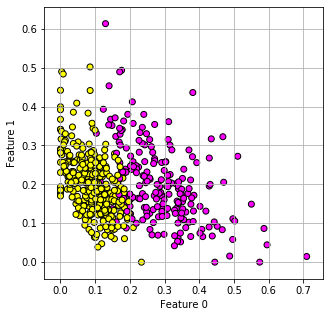

In [51]:
nmf = sklearn.decomposition.NMF(n_components=2)
data = sklearn.preprocessing.minmax_scale(cencer.data) # 資料縮放
nmf.fit(data)
trans = nmf.transform(data)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(trans[:, 0], trans[:, 1], c=cencer.target, ec='k', cmap=matplotlib.cm.spring)
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### NMF 原始特徵的線性組合

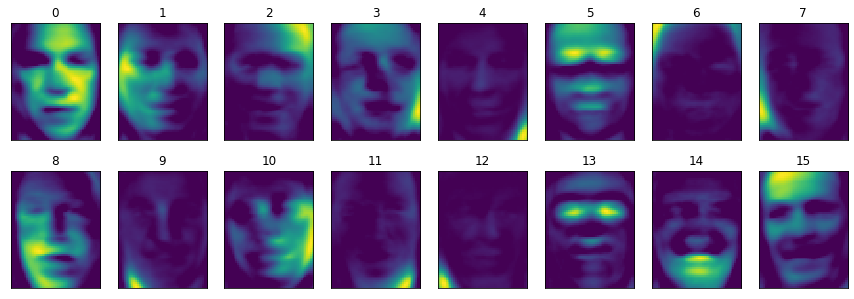

In [52]:
nmf = sklearn.decomposition.NMF(n_components=16)
nmf.fit(people.data)
nmf_data = nmf.transform(people.data)

h, w = people.images.shape[1:]
images = nmf.components_.reshape(-1, h, w) # 抓取主成分的原特徵比例, 並reshape

fig, axes = plt.subplots(2, 8, figsize=(15, 5), subplot_kw={'xticks': (), 'yticks': ()}) # subplot_kw 刪除座標標示
i = 0
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(i)
    i += 1

#### 佔有以上特徵最多部份的臉
* 0 右側臉亮
* 3 右看
* 8 左看
* 15 左看, 亮額頭

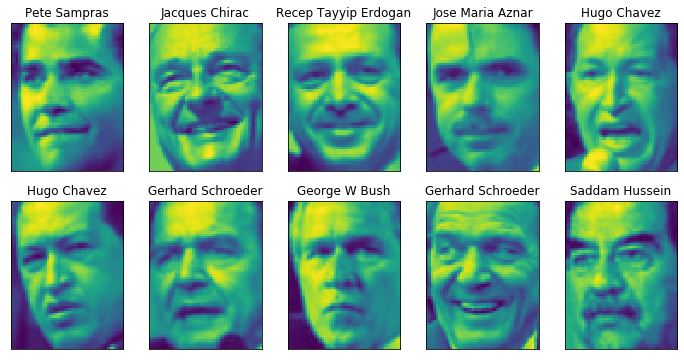

In [53]:
n = 15 # 特徵編號
arr = np.argsort(nmf_data[:, n])[::-1] # 獲取最大值

fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks': (), 'yticks': ()}) # subplot_kw 刪除座標標示
for target, image, ax in zip(people.target[arr], people.images[arr], axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

## [ICA 獨立成分分析(Independent Component Analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)
* `sklearn.decomposition.FastICA` 
    * `ica.components_` 轉換矩陣
    * `ica.mixing_` 逆轉換矩陣
* 適合分析的特徵是由不同獨立成分線性組合而成
* 要有n個以上組合特徵, 才能順利拆解成n個獨立成分
* NMF 在 n 很大時比較能處理這類問題

Text(0, 0.5, 'Feature 1')

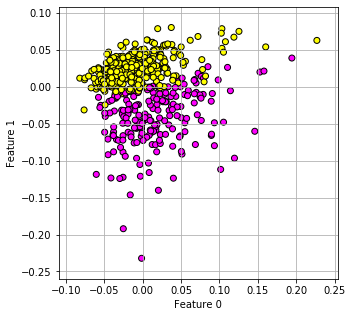

In [54]:
ica = sklearn.decomposition.FastICA(n_components=2)
data = sklearn.preprocessing.scale(cencer.data) # 資料縮放
ica.fit(data)
trans = ica.transform(data)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(trans[:, 0], trans[:, 1], c=cencer.target, ec='k', cmap=matplotlib.cm.spring)
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### ICA 的特殊應用 : [雞尾酒酒會問題](https://www.twblogs.net/a/5c544513bd9eee06ef364426)

A
 [[1.2516807  0.6080767  0.90265847 1.24982375 1.51884499]
 [1.70560855 1.0714117  0.59890452 0.9322184  1.86439029]
 [0.82007803 1.17818594 1.89680903 0.53734884 1.40082338]]


Text(0.5, 1.0, 'NMF 3 Independent Signal')

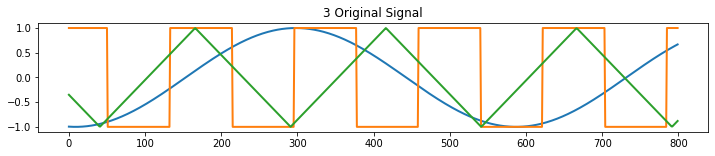

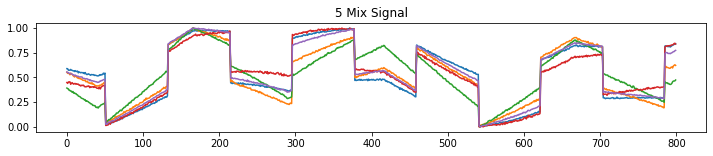

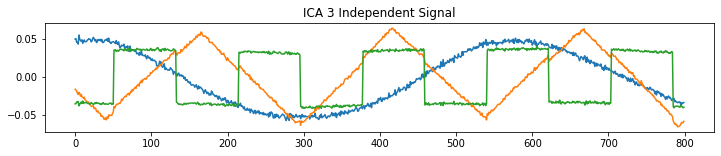

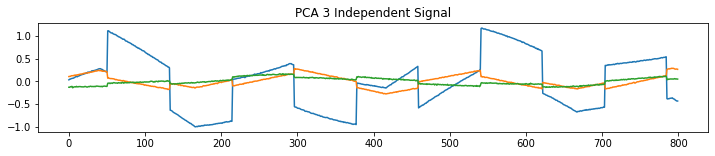

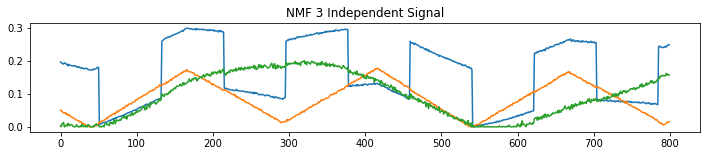

In [55]:
time = np.linspace(0, 2*np.pi, 800)
np.random.seed(7)
rand = np.random.uniform(low=1, high=6, size=6)
s1 = np.sin((rand[0] * time) + rand[3]) # Signal 1
s2 = np.sign(np.cos((rand[1] * time) + rand[4])) # Signal 2 方波
s3 = np.arcsin(np.sin((rand[2] * time) + rand[5])) / np.pi * 2 # Signal 3 鋸齒波
S = np.c_[s1, s2, s3]

# 收音 對3個訊號強度不同混音
n = 5 # n 個收音混音
A = np.random.uniform(low=0.5, high=2, size=3*n).reshape(3, n) # Mixing matrix
X = np.matmul(S, A)  # Generate observations
X += 0.025 * np.random.normal(size=X.shape)# Add noise
X = sklearn.preprocessing.minmax_scale(X)

# ICA PCA NMF
ica = sklearn.decomposition.FastICA(n_components=3)
ica.fit(X)
ica_X = ica.transform(X)

pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(X)
pca_X = pca.transform(X)

nmf = sklearn.decomposition.NMF(n_components=3)
nmf.fit(X)
nmf_X = nmf.transform(X)    

print('A\n', A)
# print('unmixing matrix:\n', ica.components_)  # Get estimated mixing matrix(X->trans)
# print('mixing matrix:\n', ica.mixing_)  # Get estimated mixing matrix(trans->X)

fig = plt.figure(figsize=(12, 2)) # Original Signal
plt.plot(S, lw=2)
plt.title('3 Original Signal')

fig = plt.figure(figsize=(12, 2)) # mix Signal
plt.plot(X)
plt.title(f'{n} Mix Signal')

fig = plt.figure(figsize=(12, 2)) # Independent Signal
plt.plot(ica_X)
plt.title('ICA 3 Independent Signal')

fig = plt.figure(figsize=(12, 2)) # Independent Signal
plt.plot(pca_X)
plt.title('PCA 3 Independent Signal')

fig = plt.figure(figsize=(12, 2)) # Independent Signal
plt.plot(nmf_X)
plt.title('NMF 3 Independent Signal')

# [流形學習 (Manifold Learning)](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold)
* [`sklearn.manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
    * 沒有`model.transform`, 需要使用`model.fit_transform`
    * 專門在二維特徵中分類
    * 完全非監督且隨機的
    * 好處是可以快速分辨資料可否分類
    * 需要大量運算資源是缺點, 另外是隨機的
* [`sklearn.manifold.MDS`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)

* [`sklearn.manifold.LocallyLinearEmbedding`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)

digits.images.shape: (8, 8)
Number of classes: 62


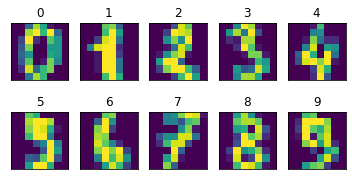

In [56]:
digits = sklearn.datasets.load_digits()
image_shape = digits.images[0].shape

print(f"digits.images.shape: {image_shape}")
print("Number of classes: {}".format(len(people.target_names)))

fig, axes = plt.subplots(2, 5, figsize=(6, 3), subplot_kw={'xticks': (), 'yticks': ()}) # subplot_kw 刪除座標標示
for target, image, ax in zip(digits.target, digits.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(digits.target_names[target])

#### PCA 表現不良

Text(0, 0.5, 'Feature 1')

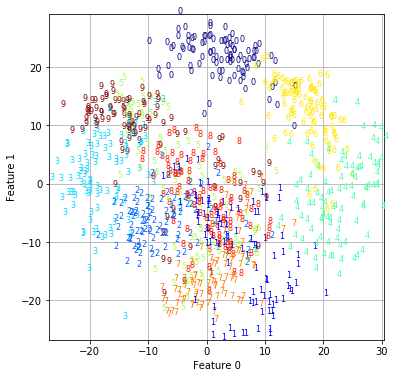

In [57]:
data = digits.data[:1000]

pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(digits.data)
out = pca.transform(data)

colors = matplotlib.cm.jet(np.linspace(0, 1, 10))
plt.figure(figsize=(6, 6))
for i in range(len(data)):
    plt.text(out[i, 0], out[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'size':8})
plt.xlim(out[:, 0].min(), out[:, 0].max())
plt.ylim(out[:, 1].min(), out[:, 1].max())
plt.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### t-SNE 容易把隔別分開

Text(0, 0.5, 'Feature 1')

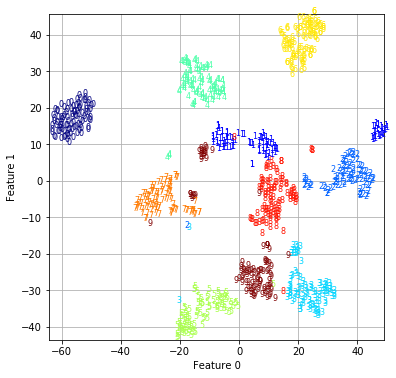

In [58]:
tsne = sklearn.manifold.TSNE(n_components=2)
out = tsne.fit_transform(data)

plt.figure(figsize=(6, 6))
for i in range(len(data)):
    plt.text(out[i, 0], out[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'size':8})
plt.xlim(out[:, 0].min(), out[:, 0].max())
plt.ylim(out[:, 1].min(), out[:, 1].max())
plt.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 多特徵t-SNE

Text(0, 0.5, 'Feature 1')

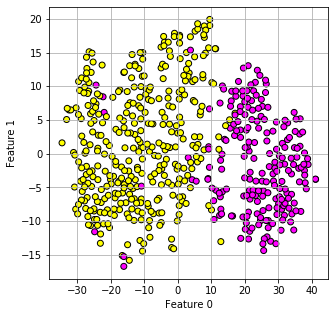

In [59]:
data = sklearn.preprocessing.scale(cencer.data) # 資料縮放
tsne = sklearn.manifold.TSNE(n_components=2, random_state=12) # 模型是隨機的
trans = tsne.fit_transform(data)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(trans[:, 0], trans[:, 1], c=cencer.target, ec='k', cmap=matplotlib.cm.spring)
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## MDS & LocallyLinearEmbedding

In [60]:
def make_hello(N=1000, text='HELLO', rseed=0):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, text, va='center', ha='center', weight='bold', size=60)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    # bool filter
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(5 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

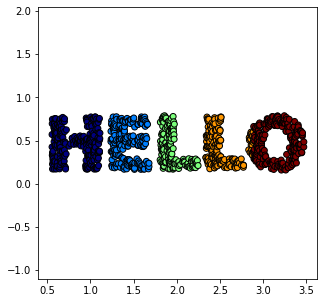

In [61]:
# 資料生成
X = make_hello(1000)
colorize = dict(c=X[:, 0], ec='k', cmap=plt.cm.get_cmap('jet', 5))
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

#### 距離矩陣 (每個點與其他點距離)

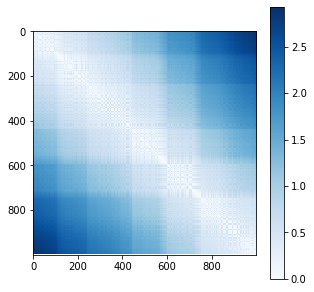

In [62]:
D = sklearn.metrics.pairwise_distances(X)
plt.figure(figsize=(5, 5))
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

### 使用距離矩陣的還原資料原始型態
* 只能恢復線性的形狀

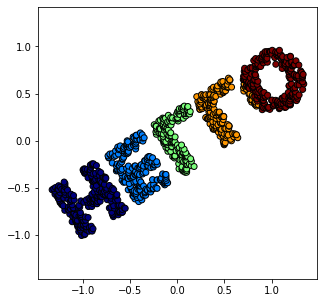

In [63]:
# dissimilarity='precomputed' 喂入距離矩陣D
model = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.figure(figsize=(5, 5))
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

#### 把資料投影到三維空間

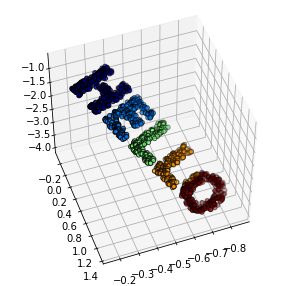

In [64]:
# 隨機轉換到3維空間
np.random.seed(1)
rand = np.random.uniform(-1, 1, (2, 3))
X3 = (X@rand)

from mpl_toolkits import mplot3d
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

#### 三圍空間轉換回二維空間

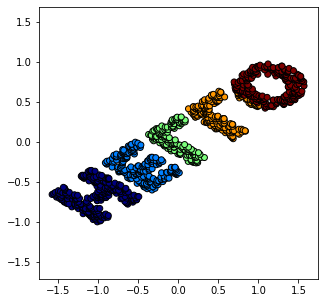

In [65]:
model = sklearn.manifold.MDS(n_components=2, random_state=1)
out = model.fit_transform(X3)
plt.figure(figsize=(5, 5))
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### 以上線性的變化都能表現良好, 但是在非線性變化中的資料

(-1.0999965685875468,
 1.0999575439357356,
 -2.1999987158414163,
 2.1999937300125527)

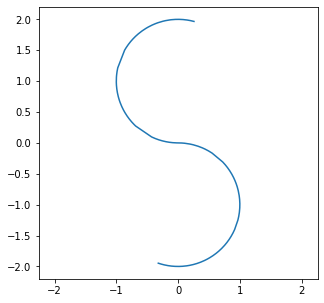

In [66]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

plt.figure(figsize=(5, 5))
plt.plot(XS[:, 0], XS[:, 2])
plt.axis('equal')

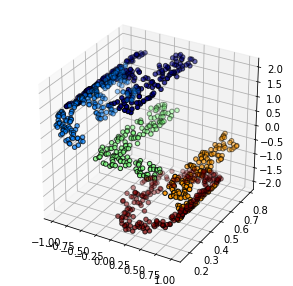

In [67]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

### 只能恢復單軸的S形狀 完全丟失了y軸

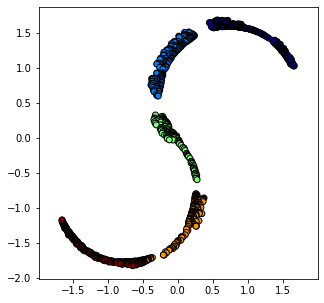

In [68]:
model = sklearn.manifold.MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.figure(figsize=(5, 5))
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

### LocallyLinearEmbedding 限定只保留周圍相近點的距離關係

<Figure size 360x360 with 0 Axes>

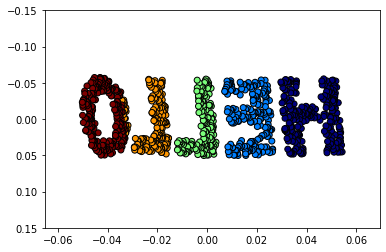

In [69]:
model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)

plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

### 將保留的點數提高 跟DMS 無異

<Figure size 360x360 with 0 Axes>

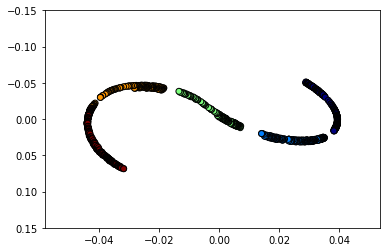

In [70]:
model = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=500, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)

plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

#### 數字上的降維表現

Text(0, 0.5, 'Feature 1')

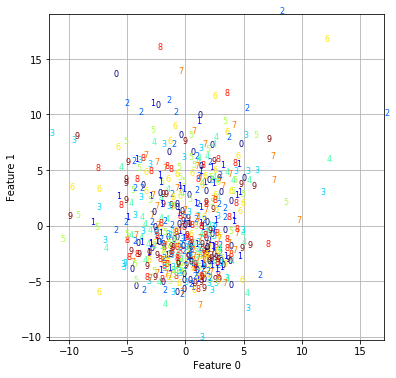

In [71]:
mds = sklearn.manifold.MDS(n_components=2)
out = mds.fit_transform(data)

plt.figure(figsize=(6, 6))
for i in range(len(data)):
    plt.text(out[i, 0], out[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'size':8})
plt.xlim(out[:, 0].min(), out[:, 0].max())
plt.ylim(out[:, 1].min(), out[:, 1].max())
plt.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 分群 ([Clustering](https://scikit-learn.org/stable/modules/clustering.html))
* 這裡的分類, 跟target. class 無關, 考慮的特徵的相近性

## [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 
* `sklearn.cluster.KMeans`
* 隨機初始化, 需要多次找出最佳結果
* 分類的數目不相同(離群的會被獨立)
* 適合"球狀"的資料(使用前資料一定要正規化)
* 有點像找到最小的"轉動慣量" 質心
    * $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
    * 對"球狀(高斯分佈不重疊)"的資料效果好, 不規則表現差
* 在高維度需要大量運算資源, 常配合降維度PCA使用
* 重要參數：
    * `km.predict()` 預測 
    * `km.labels_` 訓練資料的預測
    * `model.cluster_centers_` 分群的中心點

lable 1: 60
lable 2: 60
lable 3: 60


Text(0, 0.5, 'Feature 1')

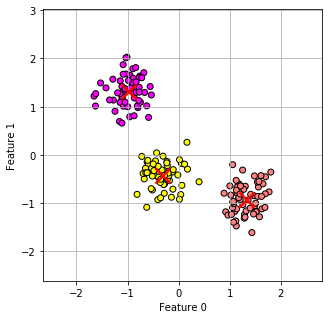

In [72]:
n = 3 # 分群數目
X, Y = sklearn.datasets.make_blobs(n_samples=180, n_features=2, centers=n, random_state=9) # 資料生成
X = sklearn.preprocessing.scale(X) # 特徵正規化
km = sklearn.cluster.KMeans(n_clusters=n)
km.fit(X)
for i in range(n):
    print(f'lable {i+1}:', (km.labels_ == i).sum())

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=km.labels_, ec='k', cmap=matplotlib.cm.spring)
ax.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 表現不佳

lable 1: 66
lable 2: 59
lable 3: 55


Text(0, 0.5, 'Feature 1')

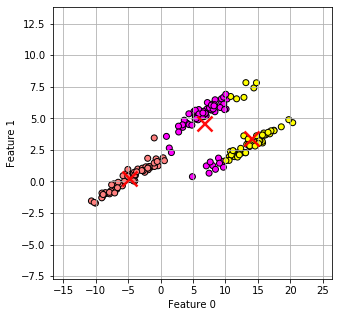

In [73]:
n = 3 # 分群數目
X, Y = sklearn.datasets.make_blobs(n_samples=180, n_features=2, centers=n, random_state=10) # 資料生成
X = np.dot(X, [[3, 1], [1, 0]])
km = sklearn.cluster.KMeans(n_clusters=n)
km.fit(X)
for i in range(n):
    print(f'lable {i+1}:', (km.labels_ == i).sum())
    
lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=km.labels_, ec='k', cmap=matplotlib.cm.spring)
ax.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

lable 1: 103
lable 2: 97


Text(0, 0.5, 'Feature 1')

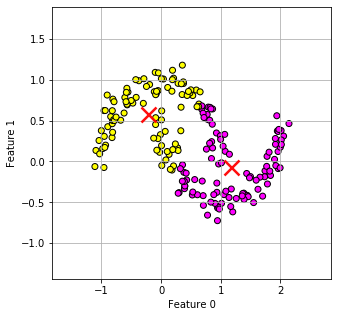

In [74]:
X, Y = sklearn.datasets.make_moons(n_samples=200, noise=0.1)
n = 2
km = sklearn.cluster.KMeans(n_clusters=n)
km.fit(X)
for i in range(n):
    print(f'lable {i+1}:', (km.labels_ == i).sum())

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=km.labels_, ec='k', cmap=matplotlib.cm.spring)
ax.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 把分群k-means 用於分解資料
* 這裡找到的是臉是一群一群相似的臉
* 凸顯出最相似的臉(最獨特最不撞臉的臉)

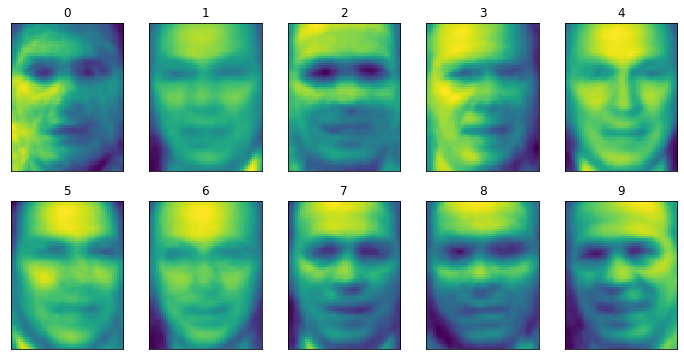

In [75]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.5)
km = sklearn.cluster.KMeans(n_clusters=60)
km.fit(people.data)
h, w = people.images.shape[1:]

images = km.cluster_centers_.reshape(-1, h, w) # 抓取主成分的原特徵比例, 並reshape

fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks': (), 'yticks': ()}) # subplot_kw 刪除座標標示
i = 0
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(i)
    i += 1

### 將分群的數目提高(遠大於原始資料labels數目)
* 反而可以把複雜的資料形狀細分
* 想像許多小圓去組合

Text(0, 0.5, 'Feature 1')

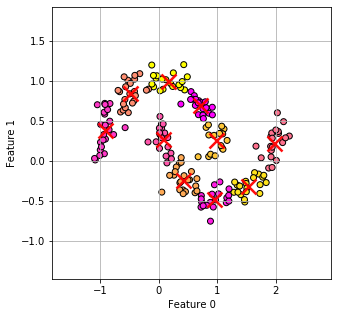

In [76]:
X, Y = sklearn.datasets.make_moons(n_samples=200, noise=0.1)
n = 10
km = sklearn.cluster.KMeans(n_clusters=n)
km.fit(X)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=km.labels_, ec='k', cmap=matplotlib.cm.spring)
ax.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### k-means 小應用  把圖形的顏色化簡為16色

Text(0.5, 1.0, '16-color Image')

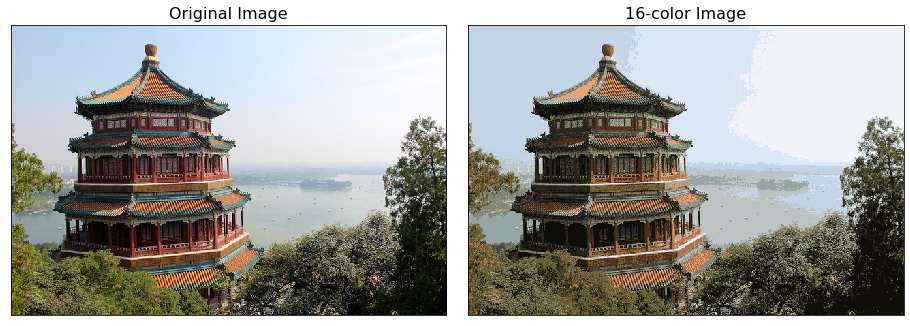

In [77]:
china = sklearn.datasets.load_sample_image("china.jpg")
data = china.reshape(-1, 3)

# MiniBatchKMeans 迷你批次 K-means 速度略快
kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=16)
kmeans.fit(data)
china2 = kmeans.cluster_centers_[kmeans.predict(data)].reshape(china.shape).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china2)
ax[1].set_title('16-color Image', size=16)

## 高斯混合模型 ([Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture))
* `sklearn.mixture.BayesianGaussianMixture` 貝葉氏混合高斯分布
* `sklearn.mixture.GaussianMixture` 混合高斯分布
* 比起k-means只能適應圓形的資料集(但是計算成本比較高), GMM可以適應是橢圓形狀的資料集
* 把GMM當成一個密度計算()
* 重要參數:
    * `covariance_type=['full'(default), 'tied', 'diag', 'spherical']` 控制形狀的自由度

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_001.png)

Text(0, 0.5, 'Feature 1')

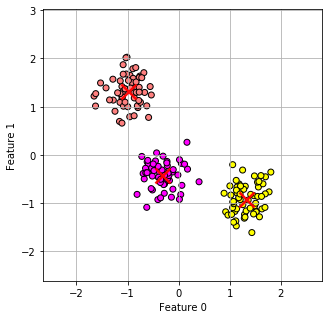

In [78]:
n = 3 # 分群數目
X, Y = sklearn.datasets.make_blobs(n_samples=180, n_features=2, centers=n, random_state=9) # 資料生成
X = sklearn.preprocessing.scale(X) # 特徵正規化
gmm = sklearn.mixture.GaussianMixture(n_components=n)
gmm.fit(X)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), ec='k', cmap=matplotlib.cm.spring)
ax.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 高斯生成的資料不重疊表現都極佳

Text(0, 0.5, 'Feature 1')

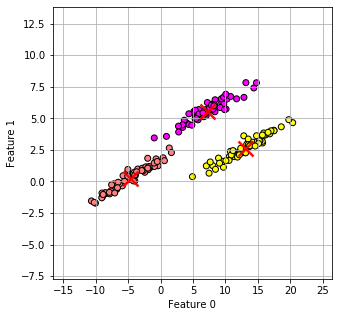

In [79]:
n = 3 # 分群數目
X, Y = sklearn.datasets.make_blobs(n_samples=180, n_features=2, centers=n, random_state=10) # 資料生成
X = np.dot(X, [[3, 1], [1, 0]]) # 長度變形
gmm = sklearn.mixture.GaussianMixture(n_components=n)
gmm.fit(X)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), ec='k', cmap=matplotlib.cm.spring)
ax.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [80]:
X.shape

(180, 2)

### 限定形狀表現就如同K-means

Text(0, 0.5, 'Feature 1')

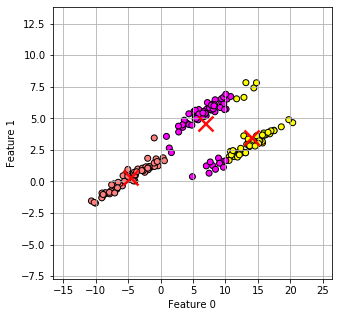

In [81]:
gmm = sklearn.mixture.GaussianMixture(n_components=n, covariance_type='spherical')
gmm.fit(X)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), ec='k', cmap=matplotlib.cm.spring)
ax.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 當然不規則表現不好

Text(0, 0.5, 'Feature 1')

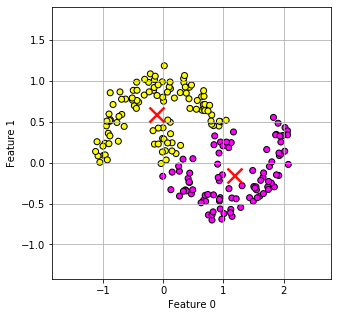

In [82]:
X, Y = sklearn.datasets.make_moons(n_samples=200, noise=0.1)
n = 2
gmm = sklearn.mixture.GaussianMixture(n_components=n)
gmm.fit(X)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), ec='k', cmap=matplotlib.cm.spring)
ax.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 如同K-means的方式  用多個"橢圓"去擬合

Text(0, 0.5, 'Feature 1')

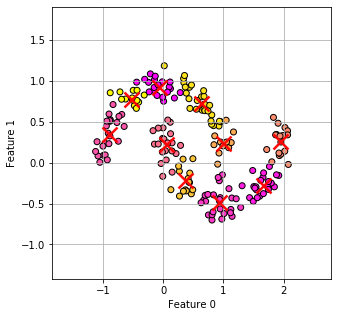

In [83]:
gmm = sklearn.mixture.GaussianMixture(n_components=10)
gmm.fit(X)

lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), ec='k', cmap=matplotlib.cm.spring)
ax.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'rx', ms=15, mew=2.5, alpha=0.95)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 凝聚分群法 ([Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html))
* `sklearn.cluster.AgglomerativeClustering`
* 彼此間最靠近的先分同群, 逐漸加大半徑

Text(0, 0.5, 'Feature 1')

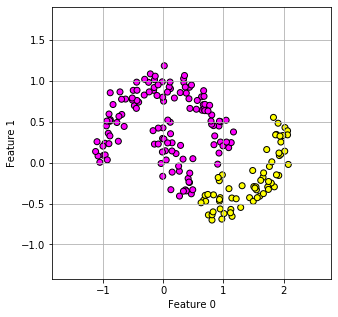

In [84]:
agg = sklearn.cluster.AgglomerativeClustering(n_clusters=2)
agg.fit_predict(X)
    
lim = X.std()
x1min, x1max = X[:, 0].min()-lim, X[:, 0].max()+lim # 畫圖範圍
x2min, x2max = X[:, 1].min()-lim, X[:, 1].max()+lim # 畫圖範圍

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=agg.labels_, ec='k', cmap=matplotlib.cm.spring)
ax.axis((x1min, x1max, x2min, x2max))
ax.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 資料重現 + 特徵工程
* 現實的資料如何處理
* 資料不連續, 資料離散
* 呈現資料的方法

## One-Hot 編碼
* [參考資料1](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)
* [參考資料2](https://medium.com/ai%E5%8F%8D%E6%96%97%E5%9F%8E/preprocessing-data-onehotencoder-labelencoder-%E5%AF%A6%E4%BD%9C-968936124d59)
* `pd.get_dummies(pd.DataFramea)` 數字類型視為連續不會特別編碼
* `sklearn.preprocessing.OneHotEncoder()`
* `sklearn.preprocessing.LabelEncoder()`

In [85]:
country=np.array(['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan'])
age=np.array([25,30,45,35,22,36])
salary=np.array([20000,32000,59000,60000,43000,52000])
dic={'country':country,'age':age,'salary':salary}
data=pd.DataFrame(dic)
data

country  age  salary
0     Taiwan   25   20000
1  Australia   30   32000
2    Ireland   45   59000
3  Australia   35   60000
4    Ireland   22   43000
5     Taiwan   36   52000

In [86]:
# 適合轉為one-hot的資料類型(離散)
data['country'].value_counts()

Taiwan       2
Ireland      2
Australia    2
Name: country, dtype: int64

#### 數字類型的資料不會被編碼

In [87]:
pd.get_dummies(data)

age  salary  country_Australia  country_Ireland  country_Taiwan
0   25   20000                  0                0               1
1   30   32000                  1                0               0
2   45   59000                  0                1               0
3   35   60000                  1                0               0
4   22   43000                  0                1               0
5   36   52000                  0                0               1

#### 硬是單獨出來也是可以編碼

In [88]:
pd.get_dummies(data.age).head(5)

22  25  30  35  36  45
0   0   1   0   0   0   0
1   0   0   1   0   0   0
2   0   0   0   0   0   1
3   0   0   0   1   0   0
4   1   0   0   0   0   0

#### 使用sklearn.preprocessing 套件

In [89]:
country

array(['Taiwan', 'Australia', 'Ireland', 'Australia', 'Ireland', 'Taiwan'],
      dtype='<U9')

In [90]:
sklearn.preprocessing.LabelEncoder().fit_transform(country)


array([2, 0, 1, 0, 1, 2])

In [91]:
sklearn.preprocessing.OneHotEncoder().fit_transform(country.reshape(-1, 1)).toarray()


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [92]:
# 數字一律都轉換
print(data)
sklearn.preprocessing.OneHotEncoder().fit_transform(data.values).toarray()

     country  age  salary
0     Taiwan   25   20000
1  Australia   30   32000
2    Ireland   45   59000
3  Australia   35   60000
4    Ireland   22   43000
5     Taiwan   36   52000


array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.]])

## 特徵分級 (連續資料轉離散)
* `sklearn.preprocessing.KBinsDiscretizer`
* 可以想像為 how to fit 

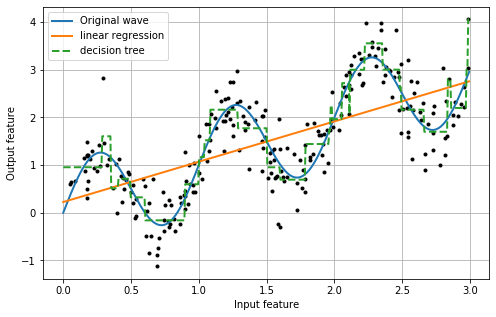

In [93]:
def y_wave(x):
    return (np.sin(x * 2 * np.pi) + x)[:, 0]

X = np.random.uniform(0, 3, size=(250, 1))
y = y_wave(X)
y = y + (0.5 * np.random.normal(size=y.shape)) # noise
line = np.linspace(0, 3, 500,endpoint=False)[:, np.newaxis]
originalwave = y_wave(line)

tree = sklearn.tree.DecisionTreeRegressor(max_depth=5).fit(X, y)
reg = sklearn.linear_model.LinearRegression().fit(X, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(X, y, '.k')
ax.plot(line, originalwave, lw=2, label='Original wave')
ax.plot(line, reg.predict(line), lw=2, label="linear regression")
ax.plot(line, tree.predict(line), '--', lw=2, label="decision tree")
ax.grid(True)
plt.ylabel("Output feature")
plt.xlabel("Input feature")
plt.legend()

### 先將資料分區 並用One-Hot編碼

In [94]:
kb = sklearn.preprocessing.KBinsDiscretizer(10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)
X_onehot = kb.transform(X)
X_onehot # 用轉換的one-hot資料

bin edges: 
 [array([0.0489565 , 0.34254501, 0.63613352, 0.92972204, 1.22331055,
       1.51689906, 1.81048758, 2.10407609, 2.3976646 , 2.69125312,
       2.98484163])]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

### 用轉換的one-hot資料來訓練
* 線性在轉換分級上有最大優勢

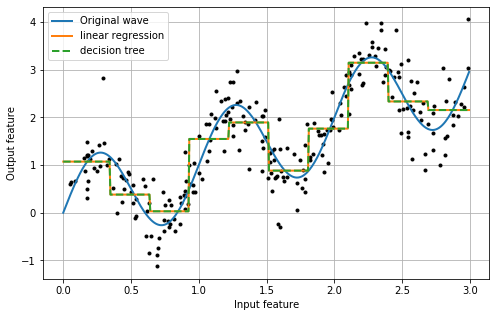

In [95]:
tree = sklearn.tree.DecisionTreeRegressor(min_samples_split=3).fit(X_onehot, y)
reg = sklearn.linear_model.LinearRegression().fit(X_onehot, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
line_onehot = kb.transform(line)# line 也需要丟進去Kb轉換one-hot

ax.plot(X, y, '.k')
ax.plot(line, originalwave, lw=2, label='Original wave')
ax.plot(line, reg.predict(line_onehot), lw=2, label="linear regression")
ax.plot(line, tree.predict(line_onehot), '--', lw=2, label="decision tree")
ax.grid(True)
plt.ylabel("Output feature")
plt.xlabel("Input feature")
plt.legend()

### 原始特徵和one-hot特徵交互作用

feature number: 11


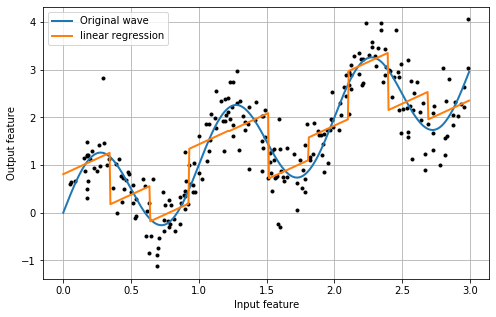

In [96]:
X_stack = np.hstack([X, X_onehot])
line_stack = np.hstack([line, line_onehot]) # line 也需要丟進去Kb轉換one-hot
print('feature number:', X_stack.shape[1])

reg = sklearn.linear_model.LinearRegression().fit(X_stack, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(X, y, '.k')
ax.plot(line, originalwave, lw=2, label='Original wave')
ax.plot(line, reg.predict(line_stack), lw=2, label="linear regression")
ax.grid(True)
plt.ylabel("Output feature")
plt.xlabel("Input feature")
plt.legend()

### 多項式交互作用

feature number: 20


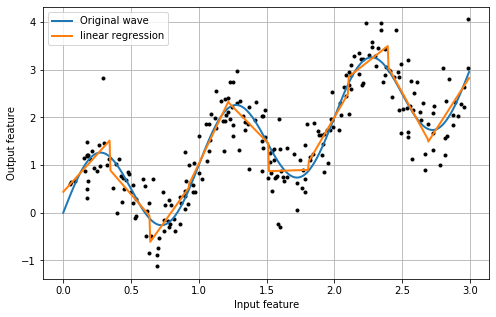

In [97]:
X_stack = np.hstack([X_onehot, X * X_onehot])
line_stack = np.hstack([line_onehot, line * line_onehot]) # line 也需要丟進去Kb轉換one-hot
print('feature number:', X_stack.shape[1])

reg = sklearn.linear_model.LinearRegression().fit(X_stack, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(X, y, '.k')
ax.plot(line, originalwave, lw=2, label='Original wave')
ax.plot(line, reg.predict(line_stack), lw=2, label="linear regression")
ax.grid(True)
plt.ylabel("Output feature")
plt.xlabel("Input feature")
plt.legend()

### 多項式模組
* `sklearn.preprocessing.PolynomialFeatures`
* 對線性回歸模型幫助比較大(讓直線可以有稍微的彎曲！)
* 參數設定
    * `degree` : integer 最高階層
    * `interaction_only` : boolean 只有彼此間交互
    * `include_bias` : boolean 要不要保留0次方(1)
* 重要屬性
    * `model.get_feature_names()` 轉換特徵的名字

new feature:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


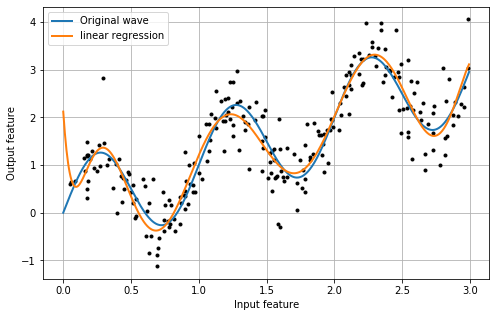

In [98]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(line)
print('new feature:\n', poly.get_feature_names())

reg = sklearn.linear_model.LinearRegression().fit(X_poly, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(X, y, '.k')
ax.plot(line, originalwave, lw=2, label='Original wave')
ax.plot(line, reg.predict(line_poly), lw=2, label="linear regression")
ax.grid(True)
plt.ylabel("Output feature")
plt.xlabel("Input feature")
plt.legend()

#### SVR 不需要轉換X  設定好的gamma值就能有好的表現(有多項式的表現)

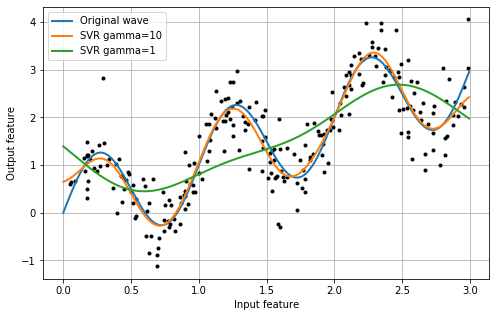

In [99]:
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(X, y, '.k')
ax.plot(line, originalwave, lw=2, label='Original wave')
for gamma in [10, 1]:
    svr = sklearn.svm.SVR(gamma=gamma).fit(X, y)
    ax.plot(line, svr.predict(line), lw=2, label=f"SVR gamma={gamma}")
ax.grid(True)
plt.ylabel("Output feature")
plt.xlabel("Input feature")
plt.legend()

### 實做boston房價分析 (考慮特徵交互作用使用Ridge會略好, 決策樹過度複雜並不會有好表現)

In [100]:
bos = sklearn.datasets.load_boston()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(bos.data,  bos.target, test_size=0.2)
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = sklearn.preprocessing.PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print('X-shape:', X_train.shape)
print('X_poly-shape:', X_train_poly.shape)

rig = sklearn.linear_model.Ridge().fit(X_train, y_train) # 多變數, 線性回歸 + L2正規化
print('Ridge Bos  Score:', rig.score(X_test, y_test))
rig = sklearn.linear_model.Ridge().fit(X_train_poly, y_train) # 多變數, 線性回歸 + L2正規化
print('Ridge Poly Score:', rig.score(X_test_poly, y_test))

tree = sklearn.tree.DecisionTreeRegressor(max_depth=5).fit(X_train, y_train) # 多變數, 線性回歸 + L2正規化
print('Tree Bos  Score:', tree.score(X_test, y_test))
tree = sklearn.tree.DecisionTreeRegressor(max_depth=5).fit(X_train_poly, y_train) # 多變數, 線性回歸 + L2正規化
print('Tree Poly Score:', tree.score(X_test_poly, y_test))

X-shape: (404, 13)
X_poly-shape: (404, 105)
Ridge Bos  Score: 0.6677602899681521
Ridge Poly Score: 0.8274040379427211
Tree Bos  Score: 0.5218205110775798
Tree Poly Score: 0.760310213412671


## 自動選取特徵(類似降維)
* 選取比較重要的特徵 刪除其餘特徵 避免容易Over fit

### 單變量統計
* `sklearn.feature_selection.SelectPercentile`
* [數學模型1](https://zh.wikipedia.org/wiki/%E6%96%B9%E5%B7%AE%E5%88%86%E6%9E%90)
* [數學模型2](https://belleaya.pixnet.net/blog/post/30754486)
* 又叫做變異數數分析, 將不同的class的單特徵取平均和標準差來比較是否能容易分出class的算法
* 參數設定
    * `percentile` (0~100) 選取百分比
* 屬性
    * `model.get_support()` 選取的特徵
    
#### 成功有效過濾雜訊 

cencer data feature number: 30
mix data feature number: 60
Train data Score with all features: 0.971
Test data Score with all features: 0.921
Train data Score with only selected features: 0.963
Test data Score with only selected features: 0.956


/home/sppool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sppool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

([], <a list of 0 Text yticklabel objects>)

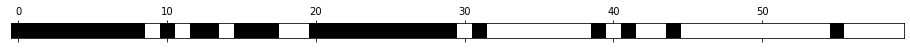

In [101]:
cencer = sklearn.datasets.load_breast_cancer()
data = cencer.data
noise = np.random.normal(size=(data.shape[0], 30)) # 雜訊
X = np.c_[data, noise] # 30data + 70noise
print('cencer data feature number:', data.shape[1])
print('mix data feature number:', X.shape[1])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, cencer.target, test_size=0.2)

select = sklearn.feature_selection.SelectPercentile(percentile=50) # select 30%
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train, y_train)
print("Train data Score with all features: {:.3f}".format(lr.score(X_train, y_train)))
print("Test data Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Train data Score with only selected features: {:.3f}".format(lr.score(X_train_selected, y_train)))
print("Test data Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

plt.matshow(select.get_support().reshape(1, -1), cmap='gray_r')
plt.yticks([])

### 用模型選擇 (Model-based Feature Selection)
* `sklearn.feature_selection.SelectFromModel`
* 選用sklearn中的分類模型來選擇

([], <a list of 0 Text yticklabel objects>)

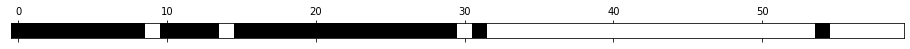

In [102]:
select = sklearn.feature_selection.SelectFromModel(sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42), threshold="median", max_features=30)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

plt.matshow(select.get_support().reshape(1, -1), cmap='gray_r')
plt.yticks([])

## 評估改善模型
### [交叉驗證](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)
* [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
* 預設分層
* 重要參數
    * `cv`(int) 分幾組交叉驗證, 或是分組的交叉驗證細項設定
* 用多組不同組的tarin, test data

#### cv 參數設定
* [`sklearn.model_selection.KFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)需要實例化
* 實例化參數
    * `n_splits`(int) k格位數目
    * `shuffle`(bool) 是否洗牌(非分層)

In [103]:
iris = sklearn.datasets.load_iris() # 資料集
logreg = sklearn.linear_model.LogisticRegression(solver='liblinear', multi_class='auto',)

scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


#### 有順序排列的index 在不分層的表下非常差

In [104]:
kfold = sklearn.model_selection.KFold(n_splits=3)
scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0. 0. 0.]


#### 隨機排列洗牌index

In [105]:
kfold = sklearn.model_selection.KFold(n_splits=3, shuffle=True)
scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.96 0.98 0.9 ]


### 留一法 (Leave-one-out cross)
* `sklearn.model_selection.LeaveOneOut()`需要實例化, 設定於cv
* 保留每一個資料都當成test-data, 其餘都是train-data
* 所以有幾組data, 就需要訓練幾組模型, 非常耗費時間
* 優點是非常準確

In [106]:
loo = sklearn.model_selection.LeaveOneOut()
scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=loo)
len(iris.data) == len(scores)

True

### 隨機分割交叉驗證 (Shuffle-split cross-validation)
* [`sklearn.model_selection.ShuffleSplit()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)需要實例化, 設定於cv
* "隨機"選取切分的資料當作tarin, teat data, 可以不使用全部data
* 重要參數
    * `n_splits` 分格數
    * `test_size` (0~1) 使用比例
    * `train_size` (0~1) 使用比例

In [107]:
# 資料分成10份, train 用5份, test用2份
shuffle_split = sklearn.model_selection.ShuffleSplit(n_splits=10, test_size=0.2, train_size=0.5)
scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.9        0.93333333 1.         0.83333333 1.         0.96666667
 0.93333333 0.96666667 1.         0.76666667]


## 特徵工程 ([Feature Engineering](https://scikit-learn.org/stable/modules/feature_extraction.html))
* 語言文字上的使用
* [`sklearn.feature_extraction.DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) 分類特徵 one-hot encoding
* [`sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) 文字特徵 計數count
* [`sklearn.feature_extraction.text.TfidfVectorize`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) 文字特徵 頻率

In [108]:
# neighborhood 使用 onehot encoding
data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]
vec = sklearn.feature_extraction.DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [109]:
# columns name
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

### Text Features

In [110]:
sample = ['aa bb cc', 'cc dd', 'aa ee ab']

In [111]:
vec = sklearn.feature_extraction.text.CountVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

aa  ab  bb  cc  dd  ee
0   1   0   1   1   0   0
1   0   0   0   1   1   0
2   1   1   0   0   0   1

In [112]:
vec = sklearn.feature_extraction.text.TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

aa        ab        bb        cc        dd        ee
0  0.517856  0.000000  0.680919  0.517856  0.000000  0.000000
1  0.000000  0.000000  0.000000  0.605349  0.795961  0.000000
2  0.473630  0.622766  0.000000  0.000000  0.000000  0.622766

## sklearn.metrics 指標模組
* [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) 距離模組
    *  `metric=[‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]`
    * 曼哈頓距離: cityblock, manhattan, l1
    * 歐幾里得距離: euclidean, l2

In [113]:
X = np.random.normal(size=(5, 2)) # 5組 x, y 双軸座標, 彼此間的距離(歐幾里得距離)

mD = sklearn.metrics.pairwise_distances(X, metric='manhattan',)
l1D = sklearn.metrics.pairwise_distances(X, metric='l1',)
mDD = np.abs((X[:, np.newaxis, :] - X[np.newaxis, :, :])).sum(-1)

eD = sklearn.metrics.pairwise_distances(X, metric='euclidean',)
l2D = sklearn.metrics.pairwise_distances(X, metric='l2',)
eDD = (((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2).sum(-1))**0.5

print(np.allclose(mD, mDD, l1D))
print(np.allclose(eD, eDD, l2D))

True
True


## 方便函式
### [距離函式 `sklearn.metrics.pairwise`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise)
* 兩組(m, n)向量 座標 距離 m * n
* sklearn.metrics.pairwise.euclidean_distances(pts1, pts2) 笛卡爾距離
* sklearn.metrics.pairwise.manhattan_distances(pts1, pts2) 曼哈頓距離

In [4]:
pts1 = np.random.uniform(size=(3, 2))
pts2 = np.random.uniform(size=(5, 2))

In [5]:
sklearn.metrics.pairwise.euclidean_distances(pts1, pts2)

array([[0.67738122, 0.61478598, 0.60508756, 0.50499219, 0.96921864],
       [0.92232853, 0.38004956, 0.61701423, 0.60662956, 0.04428144],
       [0.9825451 , 0.52187574, 0.35722167, 0.70785059, 0.91500047]])

In [6]:
(((pts1[:, np.newaxis, :] - pts2[np.newaxis, :, :])**2).sum(2))**0.5

array([[0.67738122, 0.61478598, 0.60508756, 0.50499219, 0.96921864],
       [0.92232853, 0.38004956, 0.61701423, 0.60662956, 0.04428144],
       [0.9825451 , 0.52187574, 0.35722167, 0.70785059, 0.91500047]])

In [7]:
sklearn.metrics.pairwise.manhattan_distances(pts1, pts2)

array([[0.85114686, 0.82061109, 0.60858407, 0.6115115 , 1.36164336],
       [0.95654879, 0.50576798, 0.71779499, 0.71486756, 0.05175056],
       [1.35079263, 0.70682592, 0.4947989 , 0.86854672, 1.24785819]])

In [8]:
(np.abs(pts1[:, np.newaxis, :] - pts2[np.newaxis, :, :])).sum(2)

array([[0.85114686, 0.82061109, 0.60858407, 0.6115115 , 1.36164336],
       [0.95654879, 0.50576798, 0.71779499, 0.71486756, 0.05175056],
       [1.35079263, 0.70682592, 0.4947989 , 0.86854672, 1.24785819]])

In [12]:
angle = np.linspace(0, 2 * np.pi, 361)  # 移動角度
comp = np.exp(angle * 1j)
coor = np.vstack((comp.real, comp.imag)).transpose(1, 0)

ar1 = sklearn.metrics.pairwise.euclidean_distances([[0, 0]], coor)
ar2 = sklearn.metrics.pairwise.manhattan_distances([[0, 0]], coor)
plt.plot(angle, ar1[0])
plt.plot(angle, ar2[0])
plt.ylim([0, 1.5])
print(ar2.sum()/ar1.sum())

In [9]:
ar = np.arange(100)

In [10]:
%%timeit
np.all([50< ar, ar< 70], 0)

11.2 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%%timeit
np.bitwise_and(50<ar, ar<70)

2.53 µs ± 18 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
